## 1. Описание признаков и загрузка данных



О наборе данных

RowNumber — соответствует номеру записи (строки) и не влияет на вывод.

CustomerId — содержит случайные значения и не влияет на уход клиента из банка.

Surname— фамилия клиента не влияет на его решение покинуть банк.

CreditScore — может влиять на отток клиентов, поскольку клиент с более высоким кредитным рейтингом с меньшей вероятностью покинет банк.

Geography — местоположение клиента может повлиять на его решение покинуть банк.

Gender - Интересно выяснить, играет ли пол роль в том, что клиент покидает банк.

Age — это, безусловно, важно, поскольку пожилые клиенты реже покидают банк, чем более молодые.

Tenure — обозначает количество лет, в течение которых клиент был клиентом банка. Обычно пожилые клиенты более лояльны и реже покидают банк.

Balance — также очень хороший индикатор оттока клиентов, поскольку люди с более высоким балансом на счетах с меньшей вероятностью покинут банк по сравнению с теми, у кого баланс ниже.

NumOfProducts — количество продуктов, которые клиент приобрел через банк.

HasCrCard — указывает, есть ли у клиента кредитная карта. Эта графа актуальна еще и потому, что люди с кредитной картой реже покидают банк.

IsActiveMember — активные клиенты реже покидают банк.

EstimatedSalary — как и в случае с балансом, люди с более низкой зарплатой с большей вероятностью покинут банк, чем люди с более высокой зарплатой.

Exited — независимо от того, покинул ли клиент банк.

Complain — есть у клиента жалоба или нет.

Satisfaction Score — оценка, предоставленная клиентом за разрешение жалобы.

Card Type — тип карты, которую держит клиент.

Point Earned — баллы, заработанные клиентом за использование кредитной карты.

Как мы знаем, зарегистрировать нового клиента гораздо дороже, чем сохранить существующего.

Банкам выгодно знать, что приводит клиента к решению покинуть компанию.

Предотвращение оттока позволяет компаниям разрабатывать программы лояльности и кампании по удержанию, чтобы удержать как можно больше клиентов.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Customer-Churn-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Данные не содержат нулевые значения, так как автор предоставил их уже очищенными

In [ ]:
df.shape

(10000, 18)

Удалим столбцы RowNumber,CustomerId,Surname, так как они индивидуальны для каждого клиента и не нужны при обучении

In [ ]:
df.drop(df.columns [[0,1,2]], axis=1 , inplace= True )

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df.describe(include='object')

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## 2. Непрерывные переменные

> В этой части тетрадки мы будем работать с непрерывными переменными.


Посмотрим на кредитный рейтинг клиентов банка

In [ ]:
df['CreditScore'].max()

850

In [ ]:
df['CreditScore'].min()

350

In [ ]:
df['CreditScore'].mean()

650.5288

<Axes: >

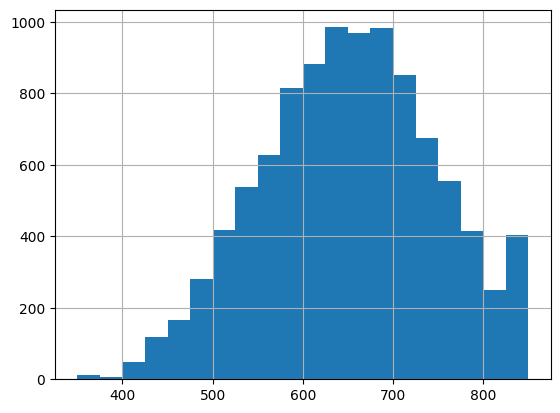

In [ ]:
df.CreditScore.hist(bins=20)

<ipython-input-16-2f76a5c9ee0e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CreditScore'])


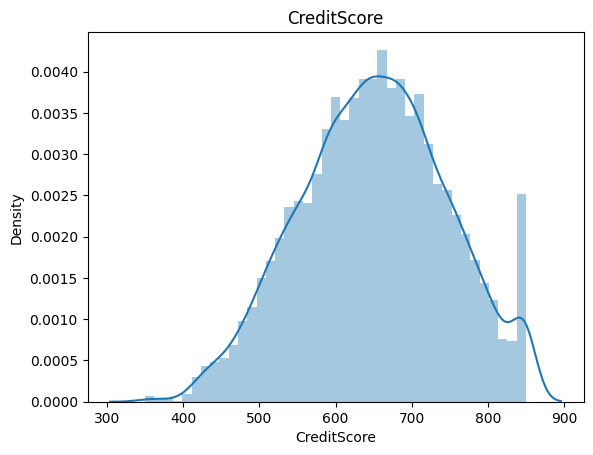

In [ ]:
plt.title('CreditScore')
sns.distplot(df['CreditScore'])
plt.show()

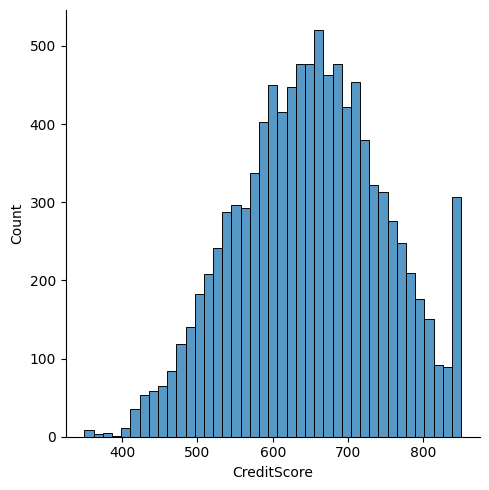

In [ ]:
sns.displot(df.CreditScore)

Построим ящик с усами, чтобы увидеть зависимость ухода клиентов от кредитного рейтинга

Text(0, 0.5, 'Кредитный рейтинг')

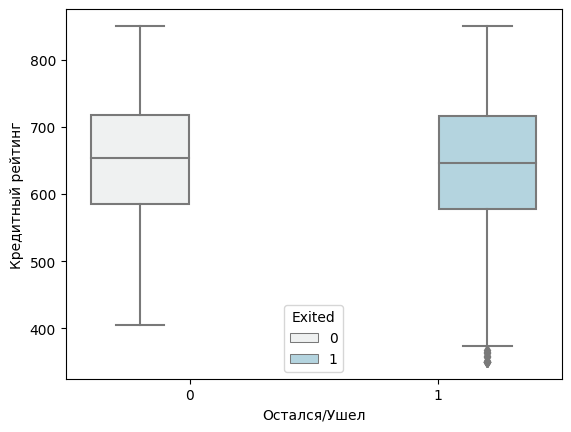

In [ ]:
sns.boxplot(y='CreditScore',x='Exited', hue='Exited',data = df,color="lightblue")
plt.xlabel('Остался/Ушел')
plt.ylabel('Кредитный рейтинг')

In [ ]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0    651.837855
1    645.414622
Name: CreditScore, dtype: float64

Средний кредитный рейтинг клиентов, которые покинули банк незначительно ниже, чем средний рейтинг клиентов, которые остались в банке

Посмотрим на баланс на счетах клиентов банка

<ipython-input-20-ad073fda9854>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Balance'])


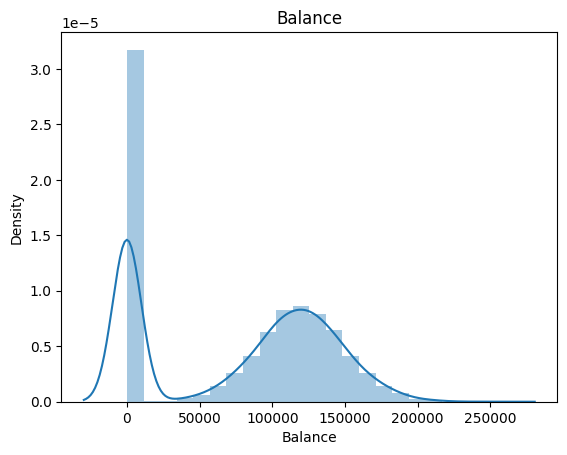

In [ ]:
plt.title('Balance')
sns.distplot(df['Balance'])
plt.show()

In [ ]:
df['Balance'].max()

250898.09

In [ ]:
df['Balance'].min()

0.0

In [ ]:
df['Balance'].mean()

76485.889288

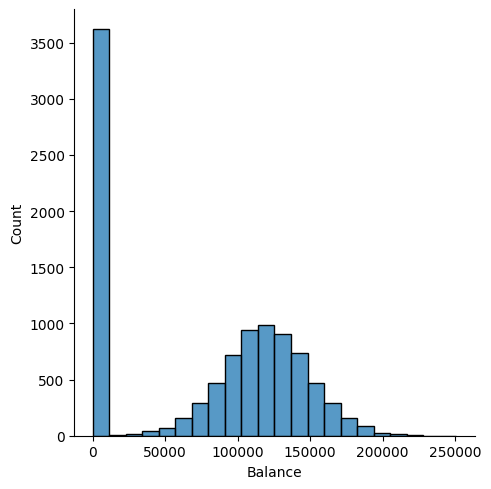

In [ ]:
sns.displot(df.Balance)

Построим ящик с усами, чтобы увидеть зависимость ухода клиентов от баланса на счетах

Text(0, 0.5, 'Баланс')

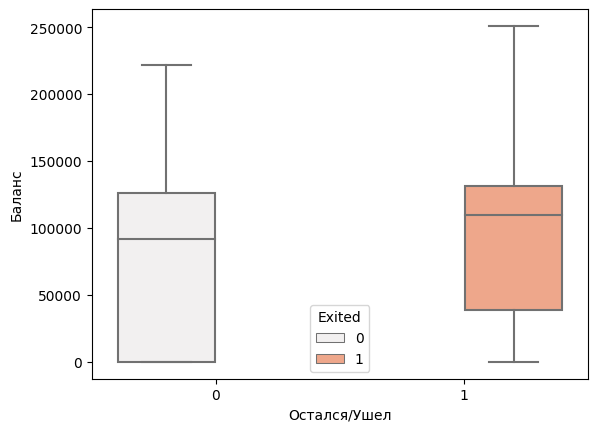

In [ ]:
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df,color="lightsalmon")
plt.xlabel('Остался/Ушел')
plt.ylabel('Баланс')

In [ ]:
df.groupby('Exited')['Balance'].mean()

Exited
0    72742.750663
1    91109.476006
Name: Balance, dtype: float64

Такми образом можно увидеть, что средний баланс на картах ушедших клиентов из банка  выше, хотя по моим первым прудположениям, люди с более высоким балансом на счетах с меньшей вероятностью покинут банк по сравнению с теми, у кого баланс ниже.

Посмотрим на признак ориентировочная заработная плата

<ipython-input-27-fcae587118e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


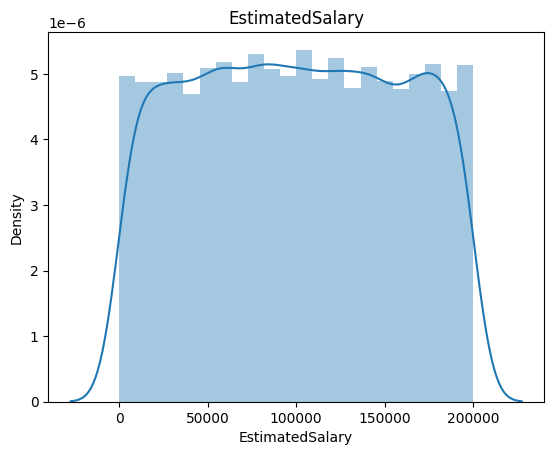

In [ ]:
plt.title('EstimatedSalary')
sns.distplot(df['EstimatedSalary'])
plt.show()

In [ ]:
df['EstimatedSalary'].max()

199992.48

In [ ]:
df['EstimatedSalary'].min()

11.58

In [ ]:
df['EstimatedSalary'].mean()

100090.239881

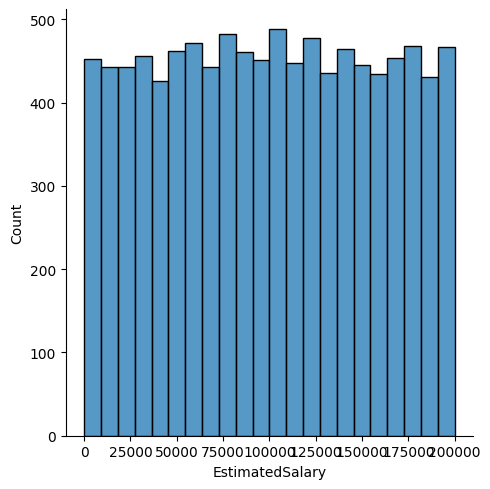

In [ ]:
sns.displot(df.EstimatedSalary)

Text(0, 0.5, 'Заработная плата')

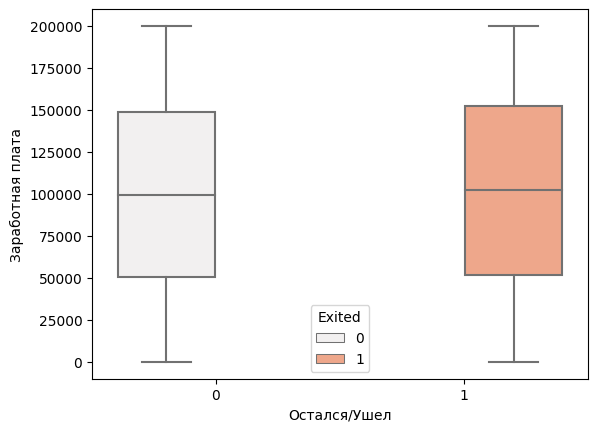

In [ ]:
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df,color="lightsalmon")
plt.xlabel('Остался/Ушел')
plt.ylabel('Заработная плата')

In [ ]:
df.groupby('Exited')['EstimatedSalary'].mean()

Exited
0     99726.853141
1    101509.908783
Name: EstimatedSalary, dtype: float64

Такми образом можно увидеть, что ориентировочная заработная плата выше у ушедших из банка клиентов

Посмотрим на признак возраст

<ipython-input-34-35542f34feb3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='red')


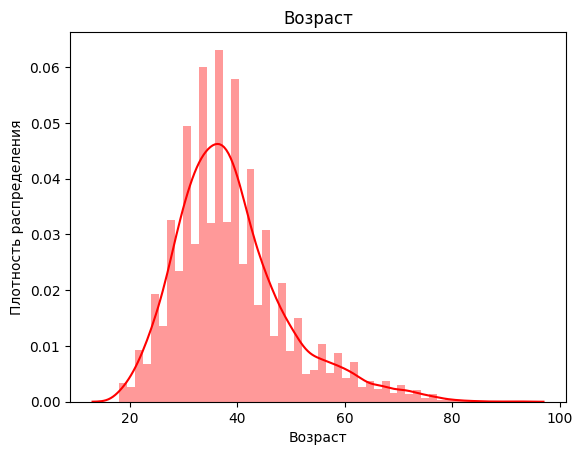

In [ ]:
plt.title('Age')
sns.distplot(df['Age'],color='red')
plt.xlabel('Возраст')
plt.ylabel('Плотность распределения')
plt.title('Возраст')
plt.show()

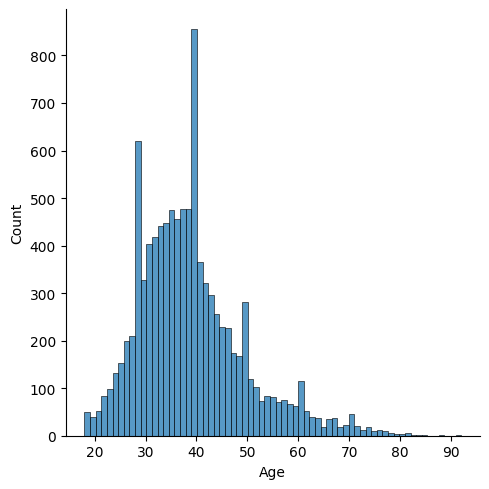

In [ ]:
sns.displot(df.Age)

In [ ]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408063
1    44.835623
Name: Age, dtype: float64

In [ ]:
df['Age'].min()

18

In [ ]:
df['Age'].max()

92

In [ ]:
df['Age'].mean()

38.9218

Text(0, 0.5, 'Возраст')

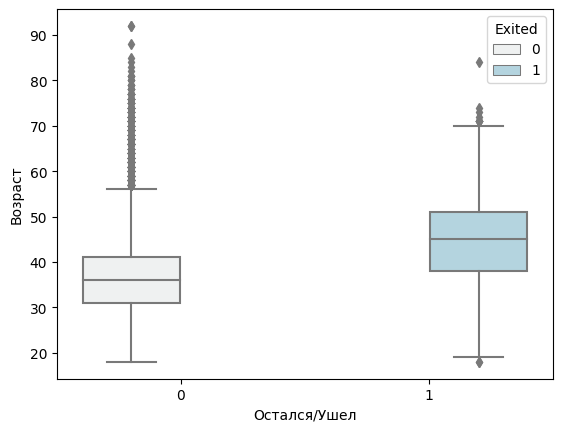

In [ ]:
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df,color="lightblue")
plt.xlabel('Остался/Ушел')
plt.ylabel('Возраст')

Можем увидеть, что средний возраст клиентов, покидающих банк выше, чем у клиентов остающихся в банке

Посмотрим на признак баллов, заработанные клиентом за использование кредитной карты.

<ipython-input-41-18af78f0c383>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Point Earned'])


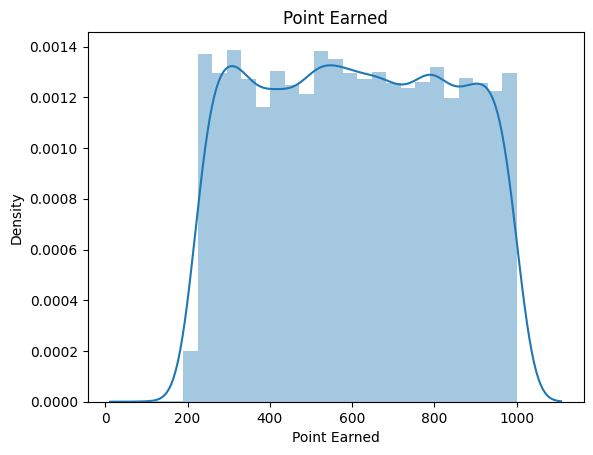

In [ ]:
plt.title('Point Earned')
sns.distplot(df['Point Earned'])
plt.show()

<Axes: xlabel='Exited', ylabel='Point Earned'>

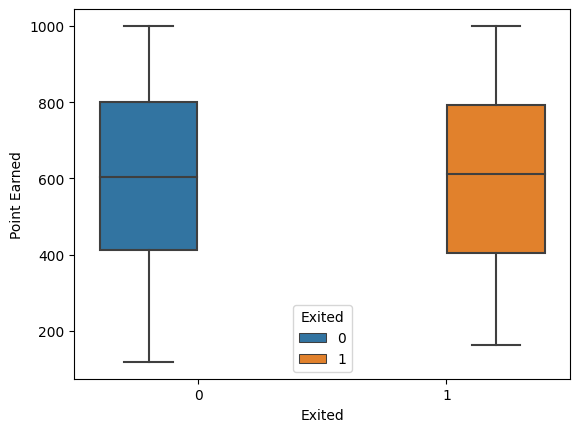

In [ ]:
sns.boxplot(y='Point Earned',x = 'Exited', hue = 'Exited',data = df)

In [ ]:
df.groupby('Exited')['Point Earned'].mean()

Exited
0    607.044084
1    604.448479
Name: Point Earned, dtype: float64

Таким образом можем увидеть, что баллы заработанные оставшихся клиентов при использовании банковской карты выше, чем у клиентов покинувших банк

## 3. Альтернативные переменные.

> В этой части тетрадки мы будем работать с альтерантивными переменными

In [ ]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

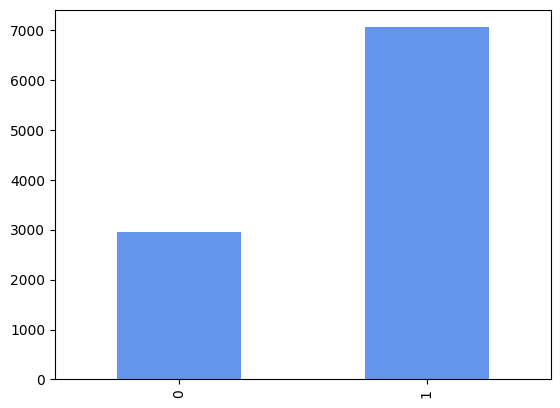

In [ ]:
df.HasCrCard.value_counts().sort_index().plot(kind='bar',color='cornflowerblue');

Text(0, 0.5, 'Количество человек')

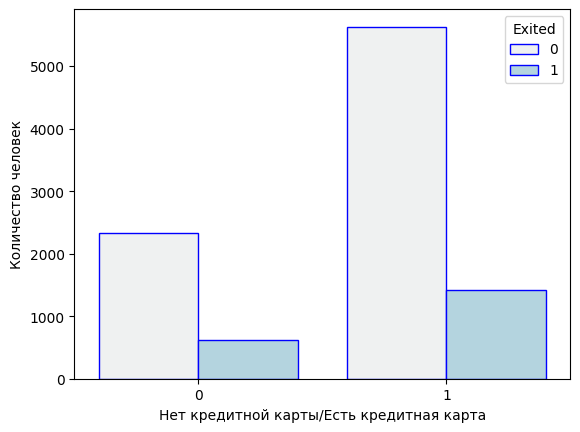

In [ ]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df,color="lightblue", ec="blue")
plt.xlabel('Нет кредитной карты/Есть кредитная карта')
plt.ylabel('Количество человек')

In [ ]:
df.groupby(['HasCrCard', 'Exited']).size()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5630
           1         1425
dtype: int64

Таким образом, клиенты имеющие кредитную карту банка больше уходят, чем клиенты, остающиеся в банке

Посмотрим на распределение клиентов по полу

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

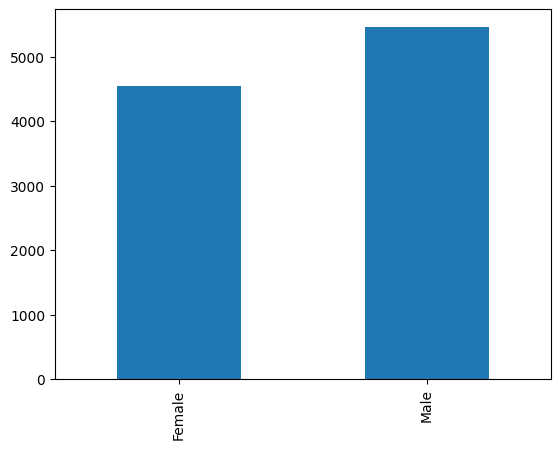

In [ ]:
df.Gender.value_counts().sort_index().plot(kind='bar');

В банке преобладают клиенты мужского пола

Text(0, 0.5, 'Количество человек')

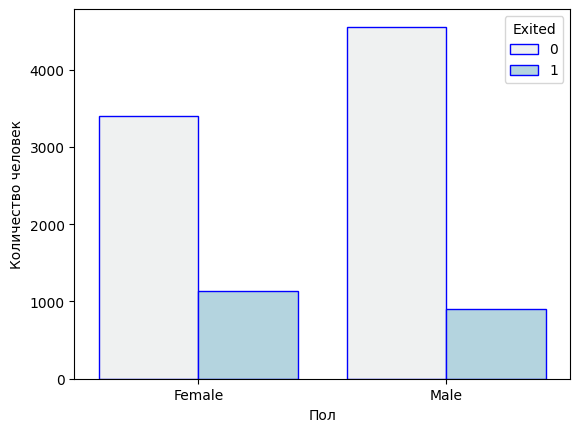

In [ ]:
sns.countplot(x='Gender', hue = 'Exited',data = df,color="lightblue", ec="blue")
plt.xlabel('Пол')
plt.ylabel('Количество человек')

In [ ]:
df.groupby(['Gender', 'Exited']).size()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4558
        1          899
dtype: int64

Клиенты женского пола покидают банк больше,чем клиенты мужского пола

Рассмотрим признак IsActiveMember

In [ ]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

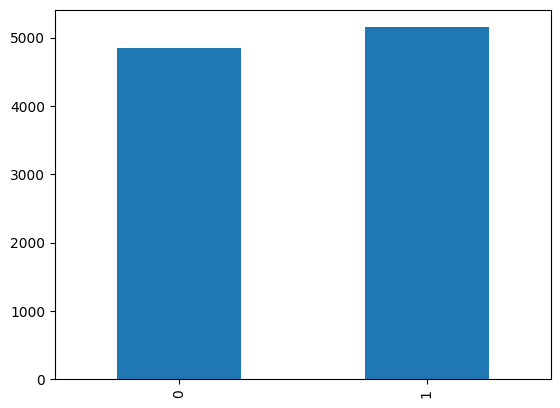

In [ ]:
df.IsActiveMember.value_counts().sort_index().plot(kind='bar');

Text(0, 0.5, 'Количество человек')

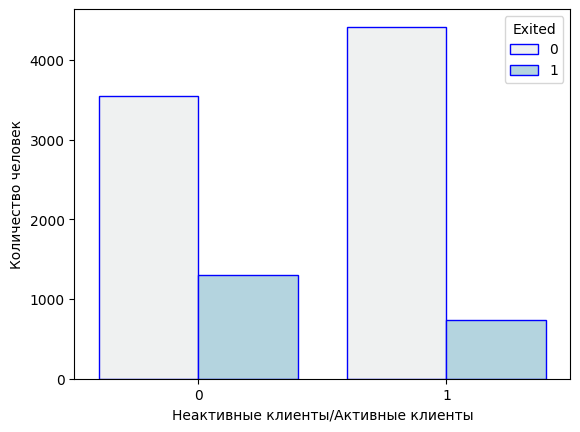

In [ ]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df,color="lightblue", ec="blue")
plt.xlabel('Неактивные клиенты/Активные клиенты')
plt.ylabel('Количество человек')

In [ ]:
df.groupby(['IsActiveMember', 'Exited']).size()

IsActiveMember  Exited
0               0         3546
                1         1303
1               0         4416
                1          735
dtype: int64

Таким образом можно заметить, что менее активные клиенты покидают банк чаще

Рассмотрим переменную Complain

In [ ]:
df['Complain'].value_counts()

0    7956
1    2044
Name: Complain, dtype: int64

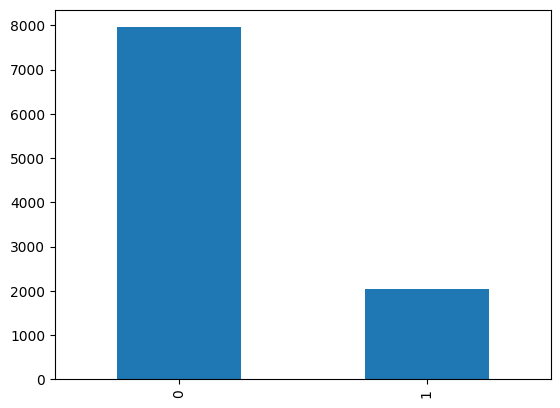

In [ ]:
df.Complain.value_counts().sort_index().plot(kind='bar');

Text(0, 0.5, 'Количество человек')

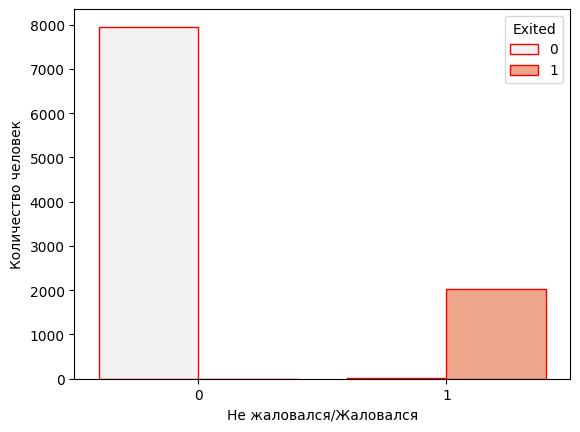

In [ ]:
sns.countplot(x='Complain', hue = 'Exited',data = df,color="lightsalmon", ec="red")
plt.xlabel('Не жаловался/Жаловался')
plt.ylabel('Количество человек')

In [ ]:
df.groupby(['Complain', 'Exited']).size()

Complain  Exited
0         0         7952
          1            4
1         0           10
          1         2034
dtype: int64

Можем увидеть, что шанс потери клиента с жалобами очень высок, так как 2034 клиента с жалобами ушли из банка, а осталось лишь 4 человека, которые были с жалобами

Посмотрим на распределение клиентов по странам

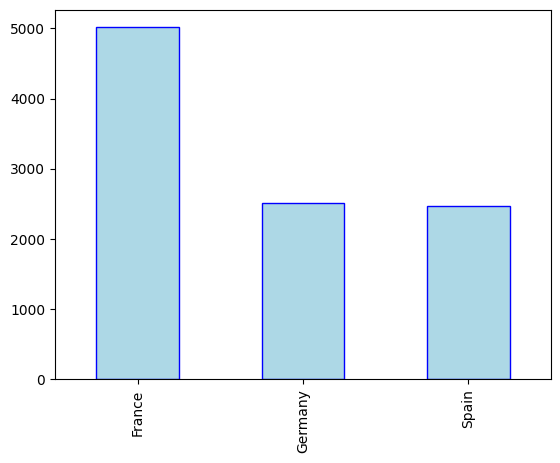

In [ ]:
df.Geography.value_counts().sort_index().plot(kind='bar',color="lightblue", ec="blue");

In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Можем увидеть, что больше всего клиентов банка из Франции, а в Германии и Испании практически одинаоковое кол-во

Посмотрим на разбиение Exited по странам

Text(0, 0.5, 'Количество человек')

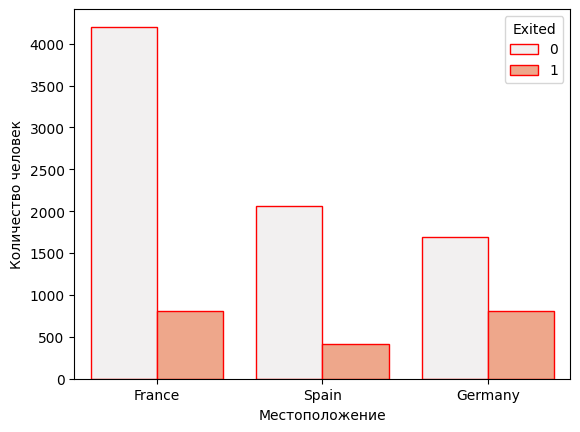

In [ ]:
sns.countplot(x='Geography', hue = 'Exited',data = df,color="lightsalmon", ec="red")
plt.xlabel('Местоположение')
plt.ylabel('Количество человек')

In [ ]:
df.groupby(['Geography', 'Exited']).size()

Geography  Exited
France     0         4203
           1          811
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64

Германия показвает наибольший отток клиентов

Посмотрим на кол-во лет в банке

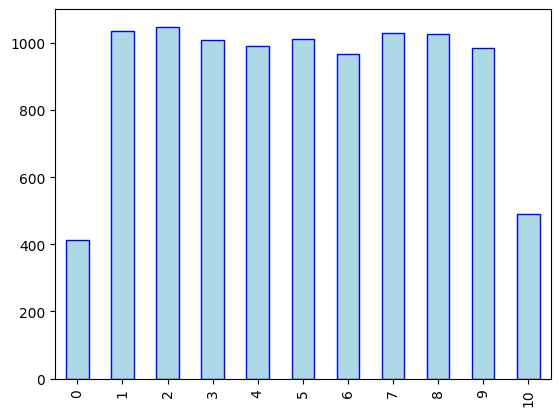

In [ ]:
df.Tenure.value_counts().sort_index().plot(kind='bar',color="lightblue", ec="blue");

Text(0, 0.5, 'Количество человек')

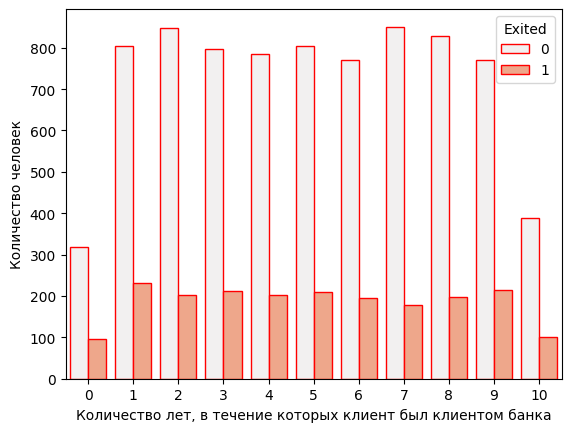

In [ ]:
sns.countplot(x='Tenure', hue = 'Exited',data = df,color="lightsalmon", ec="red")
plt.xlabel('Количество лет, в течение которых клиент был клиентом банка')
plt.ylabel('Количество человек')

In [ ]:
df.groupby(['Tenure', 'Exited']).size()

Tenure  Exited
0       0         318
        1          95
1       0         803
        1         232
2       0         847
        1         201
3       0         796
        1         213
4       0         786
        1         203
5       0         803
        1         209
6       0         771
        1         196
7       0         851
        1         177
8       0         828
        1         197
9       0         770
        1         214
10      0         389
        1         101
dtype: int64

Большее кол-во человек ушло в 1-ый год пребывания в банке, идет медленный спад до 8 года. На 8-9 годах отток показывает увеличение

Посомтрим на переменную кол-во продуктов, приобретенных через банк

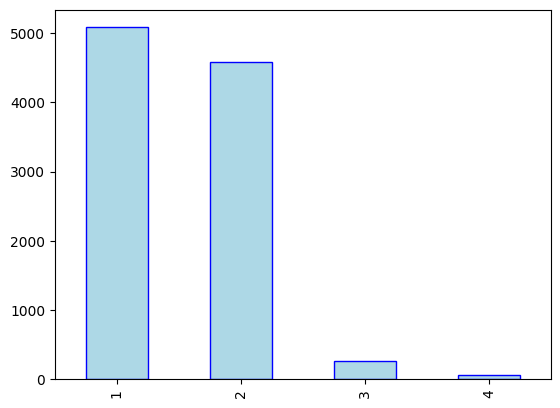

In [ ]:
df.NumOfProducts.value_counts().sort_index().plot(kind='bar',color="lightblue", ec="blue");

Text(0, 0.5, 'Количество человек')

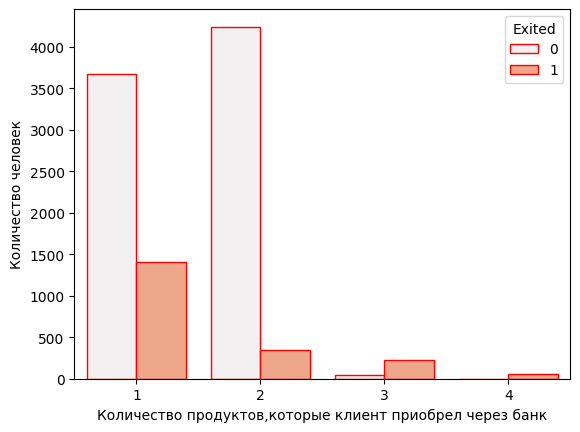

In [ ]:
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df,color="lightsalmon", ec="red")
plt.xlabel('Количество продуктов,которые клиент приобрел через банк')
plt.ylabel('Количество человек')

In [ ]:
df.groupby(['NumOfProducts', 'Exited']).size()

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4241
               1          349
3              0           46
               1          220
4              1           60
dtype: int64

In [ ]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

 Самый маленький шанс оттока у клиентов с двумя продуками банка.

Может также заметить, что клиенты, приобретающие 4 продукта через банк(60 человек) все покинули банк

ВЫВОД:После 2 продуктов с их увеличением увеличивается также и отток клиентов



Посмотрим на оценки, которые ставят клиенты после решения жалобы

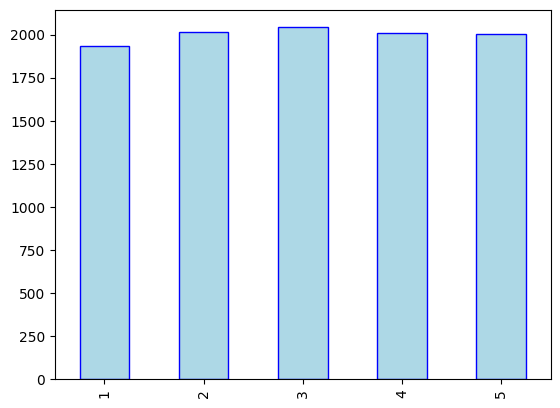

In [ ]:
df['Satisfaction Score'].value_counts().sort_index().plot(kind='bar',color="lightblue", ec="blue");

In [ ]:
df['Satisfaction Score'].value_counts()

3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction Score, dtype: int64

Преобладает оценка 3

Text(0, 0.5, 'Количество человек')

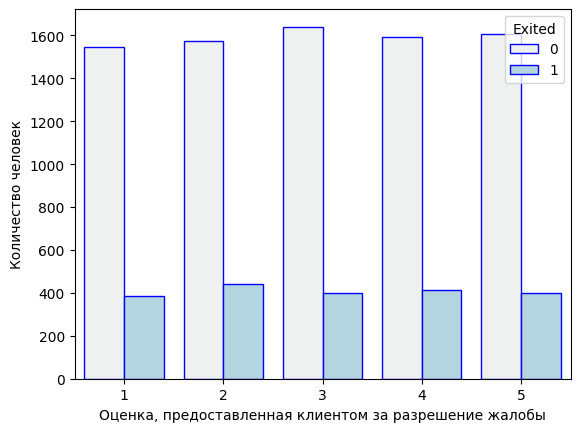

In [ ]:
sns.countplot(x='Satisfaction Score', hue = 'Exited',data = df,color="lightblue", ec="blue")
plt.xlabel('Оценка, предоставленная клиентом за разрешение жалобы')
plt.ylabel('Количество человек')

In [ ]:
df.groupby(['Satisfaction Score', 'Exited']).size()

Satisfaction Score  Exited
1                   0         1545
                    1          387
2                   0         1575
                    1          439
3                   0         1641
                    1          401
4                   0         1594
                    1          414
5                   0         1607
                    1          397
dtype: int64

439 покинувших банк клиентов поставили оценку 2 после решения их жалобы

Рассмотрим целевую переменную

Text(0, 0.5, 'Количество человек')

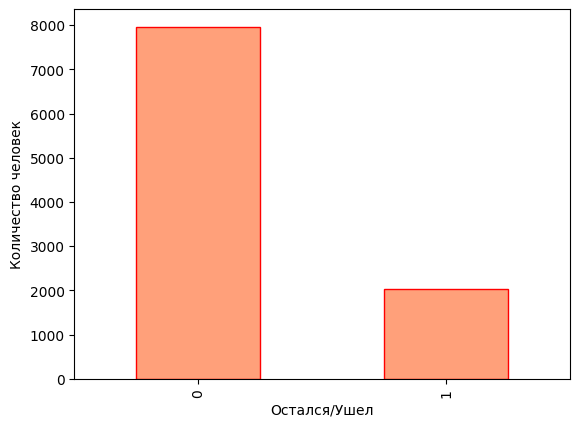

In [ ]:
df['Exited'].value_counts().sort_index().plot(kind='bar',color="lightsalmon", ec="red");
plt.xlabel('Остался/Ушел')
plt.ylabel('Количество человек')

In [ ]:
x=df[df['Exited']==1]['Exited'].value_counts()

In [ ]:
x*100/df['Exited'].size

1    20.38
Name: Exited, dtype: float64

In [ ]:
y=df[df['Exited']==0]['Exited'].value_counts()

In [ ]:
y*100/df['Exited'].size

0    79.62
Name: Exited, dtype: float64

In [ ]:
import numpy as np

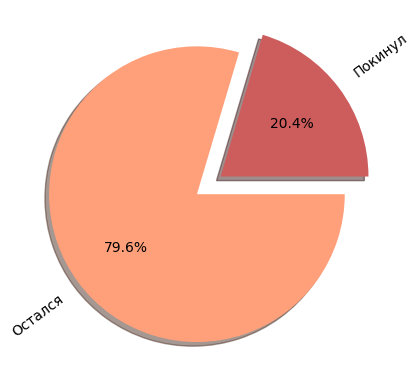

In [ ]:
mycolors = ["indianred","lightsalmon"]
mylabels = ["Покинул", "Остался"]
y=np.array([20.4,79.6])
myexp = [0.2, 0]
plt.pie(y, labels = mylabels,shadow = True,explode = myexp, colors =  mycolors,autopct='%1.1f%%', rotatelabels=True)
plt.show()

In [ ]:
df.groupby('Exited').size()

Exited
0    7962
1    2038
dtype: int64

Рассмотрим переменную тип карты

In [ ]:
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

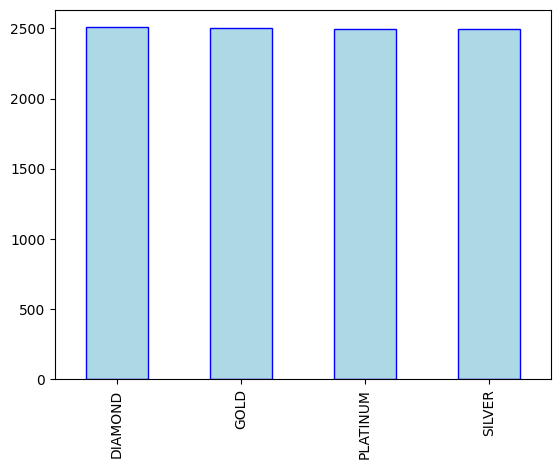

In [ ]:
df['Card Type'].value_counts().sort_index().plot(kind='bar',color="lightblue", ec="blue");

<Axes: xlabel='Card Type', ylabel='count'>

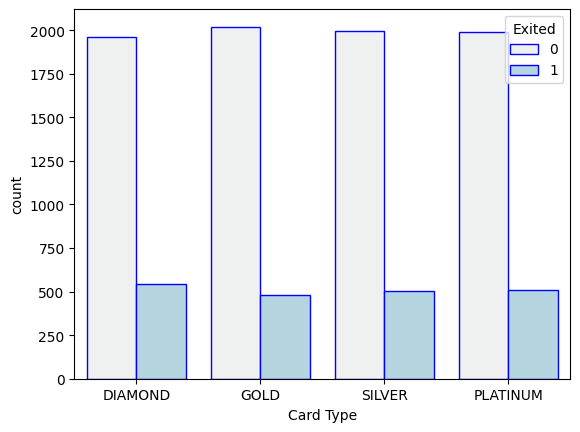

In [ ]:
sns.countplot(x='Card Type', hue = 'Exited',data = df,color="lightblue", ec="blue")

In [ ]:
df.groupby(['Card Type', 'Exited']).size()

Card Type  Exited
DIAMOND    0         1961
           1          546
GOLD       0         2020
           1          482
PLATINUM   0         1987
           1          508
SILVER     0         1994
           1          502
dtype: int64

клиенты с типом карты DIAMOND покидают банк чаще, чем клиенты с другими типами карт

## 4.Посмотрим на зависимость переменных


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

<ipython-input-89-693078ebb153>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr());
<ipython-input-89-693078ebb153>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,mask=matrix,cmap='Reds');


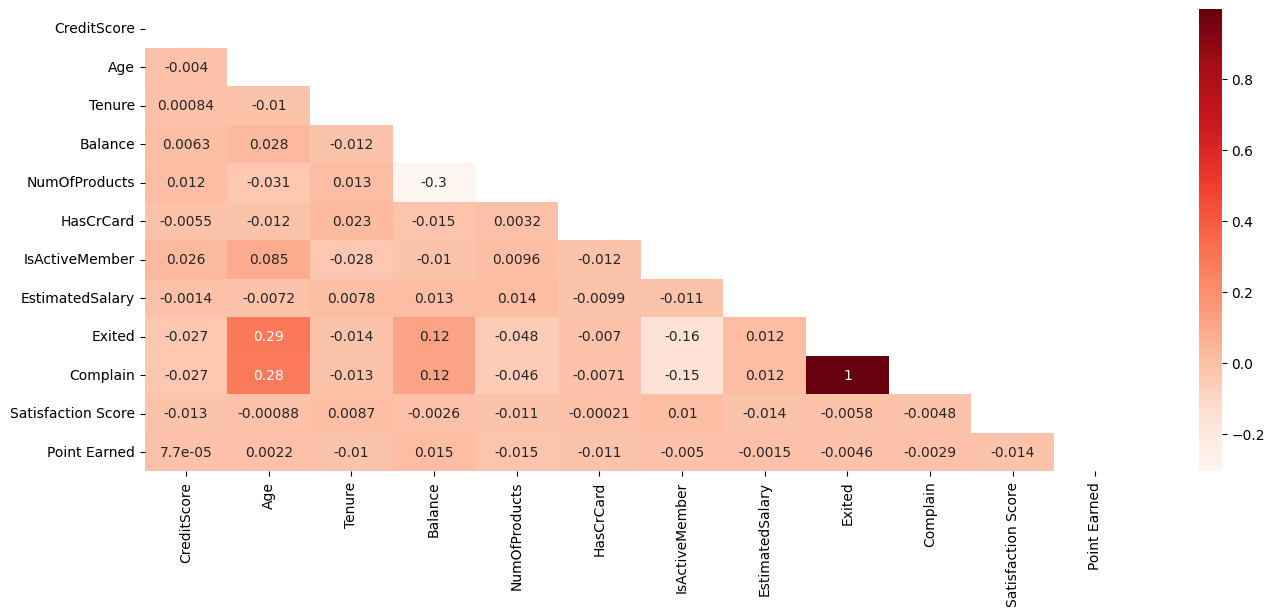

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6));
matrix = np.triu(df.corr());
sns.heatmap(df.corr(), annot = True,mask=matrix,cmap='Reds');

Таким образом наиболее коррелируемые признаками являются:


С целевой переменной (Exited) кореллируют признаки Complain,Age, Balance,Gender

Особо выделяется связь признаков Exited и Complain

Также коррелирует Сomplain и Age,Balance,Gender

Balance и NumOfProducts

IsActiveMember и Exited,Complain

In [ ]:
df=df.drop(['Complain'],axis=1)

<ipython-input-91-36e594fab79b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(df.corr())
<ipython-input-91-36e594fab79b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, mask=mask,cmap='Reds')


<Axes: >

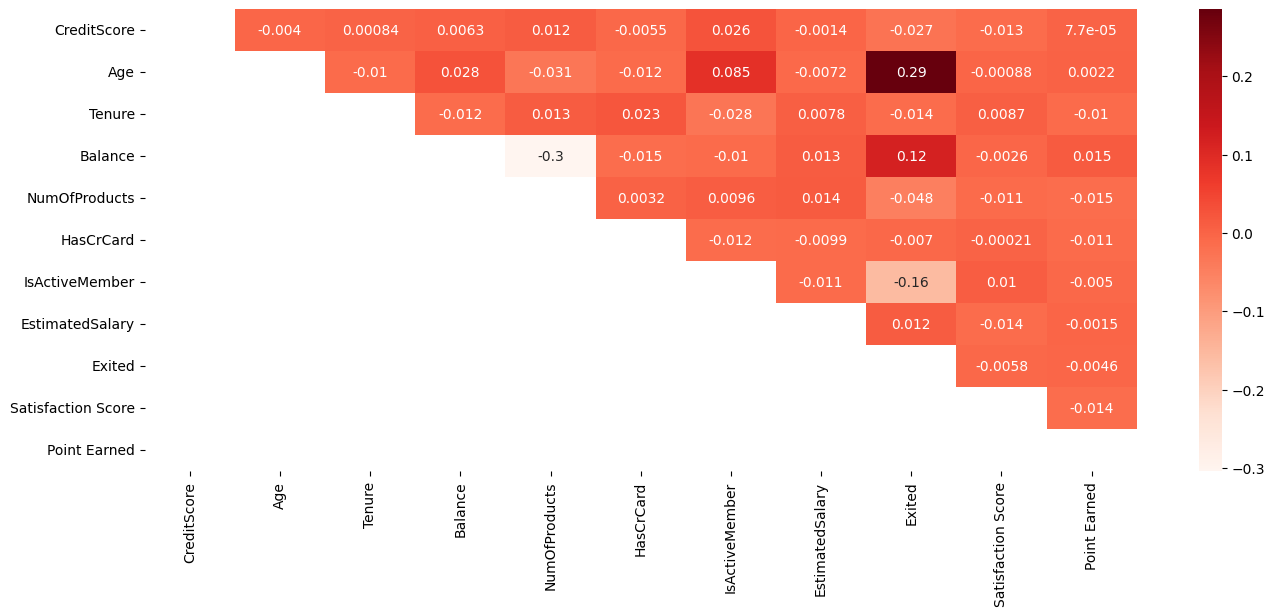

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6));
mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask,cmap='Reds')

## 5.Интересные зависимости

Text(0.5, 1.0, 'Количество продуктов-Заработная плата')

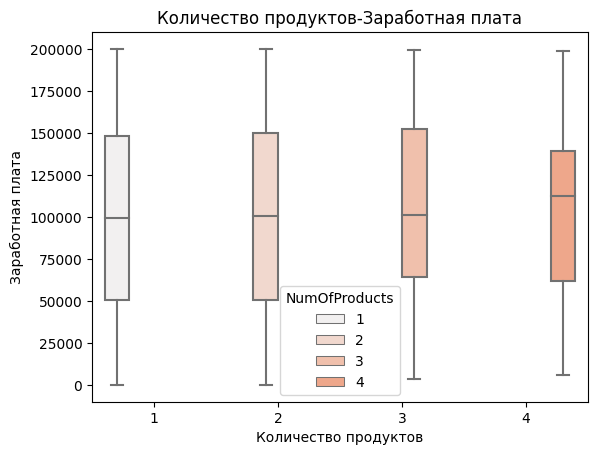

In [ ]:
sns.boxplot(y='EstimatedSalary',x = 'NumOfProducts', hue = 'NumOfProducts',data = df,color="lightsalmon")
plt.xlabel('Количество продуктов')
plt.ylabel('Заработная плата')
plt.title('Количество продуктов-Заработная плата')

у клиентов, которые приобретали 4 продукта через банк ориентировочная средняя зп выше

In [ ]:
df.groupby('NumOfProducts')['EstimatedSalary'].mean()

NumOfProducts
1     99487.256851
2    100452.012821
3    104318.130564
4    104763.723333
Name: EstimatedSalary, dtype: float64

Text(0.5, 1.0, 'Количество продуктов-Баланс')

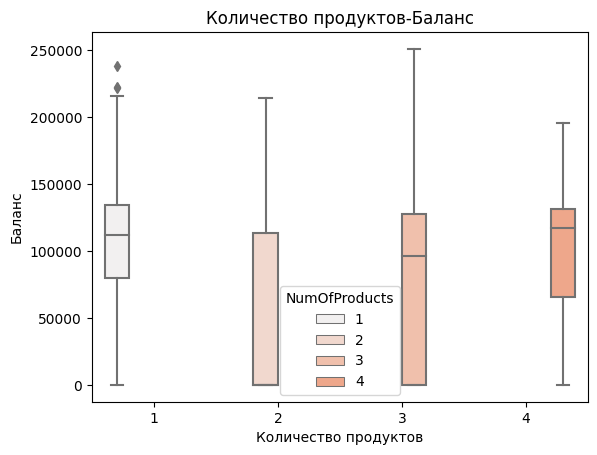

In [ ]:
sns.boxplot(y='Balance',x = 'NumOfProducts', hue = 'NumOfProducts',data = df,color="lightsalmon")
plt.xlabel('Количество продуктов')
plt.ylabel('Баланс')
plt.title('Количество продуктов-Баланс')

In [ ]:
df.groupby('NumOfProducts')['Balance'].mean()

NumOfProducts
1    98551.870614
2    51879.145813
3    75458.328195
4    93733.135000
Name: Balance, dtype: float64

у клиентов с  1 продуктом средний баланс на счете выше

<Axes: xlabel='NumOfProducts', ylabel='CreditScore'>

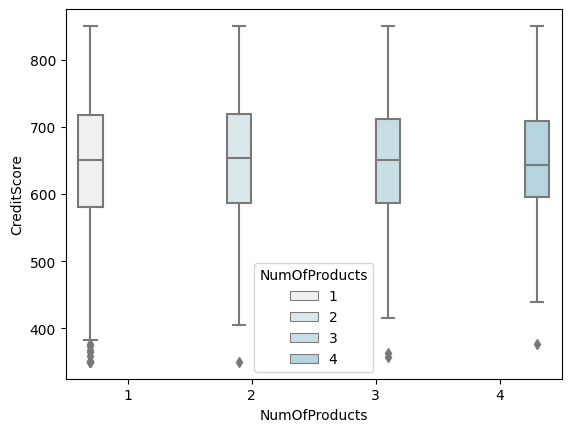

In [ ]:
sns.boxplot(y='CreditScore',x = 'NumOfProducts', hue = 'NumOfProducts',data = df,color="lightblue")

In [ ]:
df.groupby('NumOfProducts')['CreditScore'].mean()

NumOfProducts
1    649.120968
2    652.188671
3    648.105263
4    653.583333
Name: CreditScore, dtype: float64

у клиентов приобретаыших 4 пролукта через банк продуктом средний кредитный рейтинг выше

<Axes: xlabel='Gender', ylabel='Balance'>

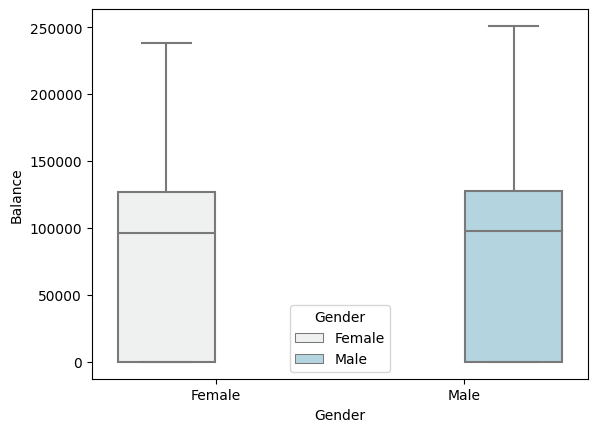

In [ ]:
sns.boxplot(y='Balance',x = 'Gender', hue = 'Gender',data = df,color="lightblue")

In [ ]:
df.groupby('Gender')['Balance'].mean()

Gender
Female    75659.369139
Male      77173.974506
Name: Balance, dtype: float64

Мужчины имеют средний баланс на счетах карт выше

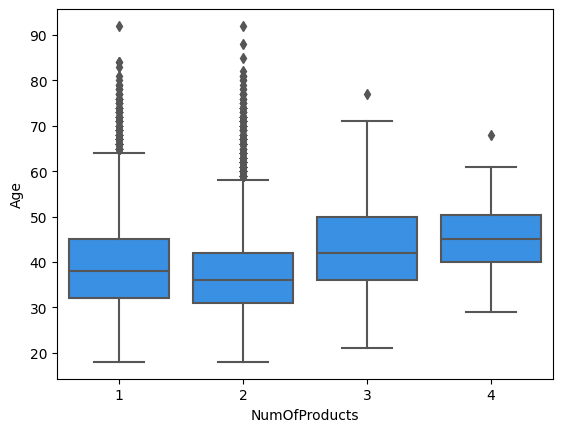

In [ ]:
sns.boxplot(x='NumOfProducts', y='Age', data=df,color="dodgerblue")
plt.show()

In [ ]:
df.groupby('NumOfProducts')['Age'].mean()

NumOfProducts
1    39.673092
2    37.753595
3    43.195489
4    45.683333
Name: Age, dtype: float64

4 продукта череез банк приобретают клиенты с средним возраст - 45 лет

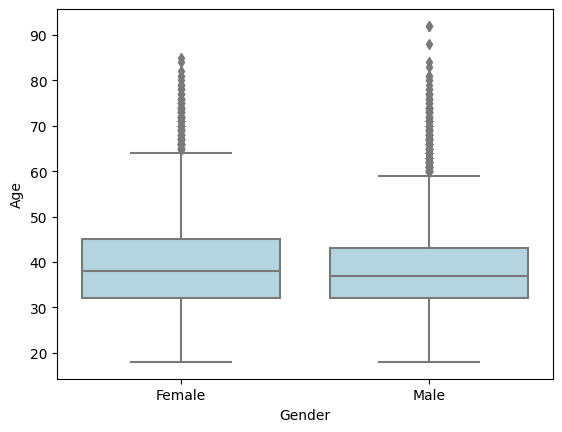

In [ ]:
sns.boxplot(x='Gender', y='Age', data=df,color="lightblue")
plt.show()

In [ ]:
df.groupby('Gender')['Age'].mean()

Gender
Female    39.238389
Male      38.658237
Name: Age, dtype: float64

средний возраст женщин выше

<Axes: xlabel='NumOfProducts', ylabel='count'>

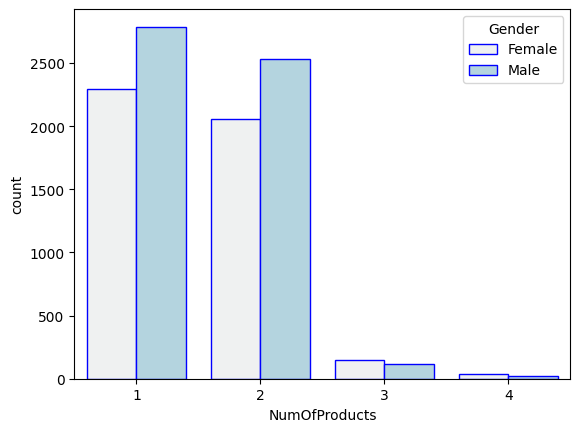

In [ ]:
sns.countplot(x='NumOfProducts', hue = 'Gender',data = df,color="lightblue", ec="blue")

Женщины чаще приобретают третий и четвертый продукт банка, чем мужчины

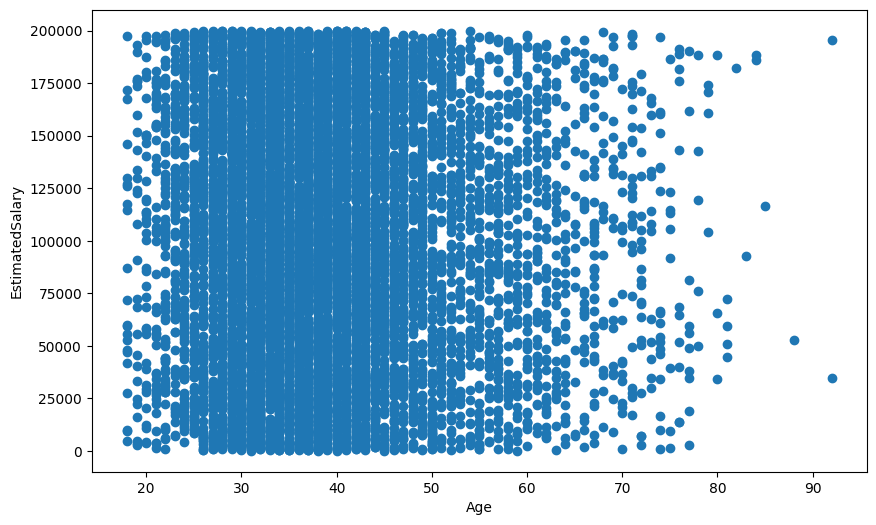

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Age'], y = df['EstimatedSalary'])
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")

plt.show()

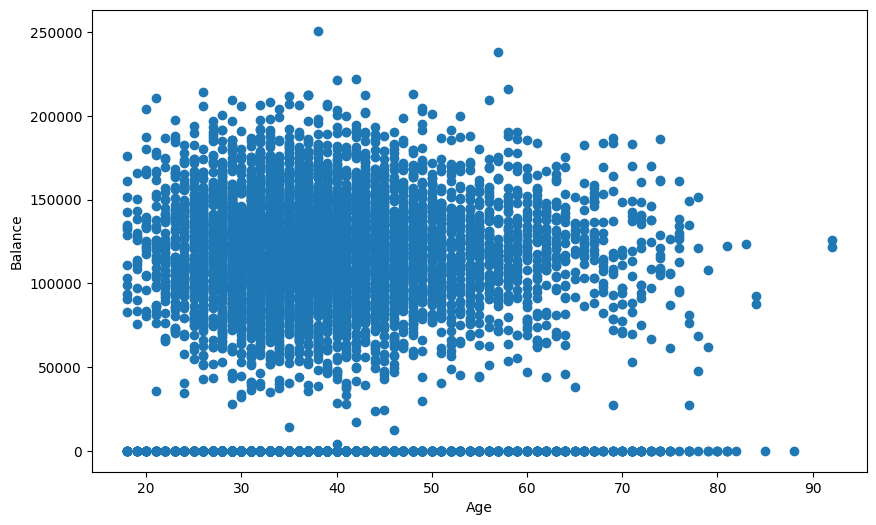

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Age'], y = df['Balance'])
plt.xlabel("Age")
plt.ylabel("Balance")

plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

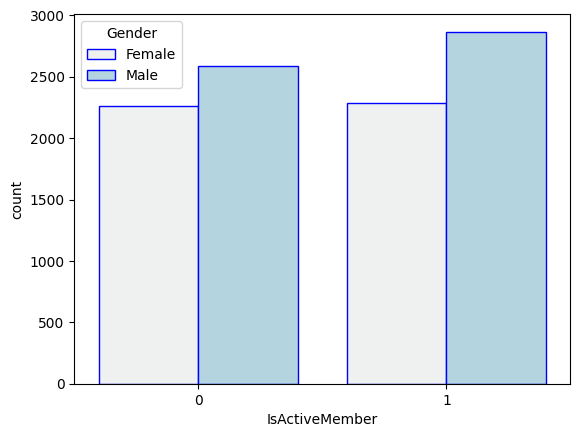

In [ ]:
sns.countplot(x='IsActiveMember', hue = 'Gender',data = df,color="lightblue", ec="blue")

In [ ]:
df.groupby(['IsActiveMember', 'Gender']).size()

IsActiveMember  Gender
0               Female    2259
                Male      2590
1               Female    2284
                Male      2867
dtype: int64

Мужчины активнее

## 6.Работаем с аномалиями

> В этой части тетрадки мы будем работать с аномалиями

In [ ]:
def outlier_iqr(data, col, threshold = 3):

    # интерквантильный размах
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

    # насколько размахов отступать
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)

    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(axis=1)
    return anomalies, up_bound, low_bound

In [ ]:
df1=df.drop(['Geography', 'Gender','Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Exited', 'Satisfaction Score', 'Card Type'],axis=1)

In [ ]:
a,l,r = outlier_iqr(df1, df1.columns)
(a==True).sum()#показывает является ли конкретное наблюдение аномалией

12

In [ ]:
# интерквантильный размах
IQR = df['CreditScore'].quantile(0.75) - df['CreditScore'].quantile(0.25)

# насколько размахов отступать
up_bound = df['CreditScore'].quantile(0.75) + (IQR * 3)
low_bound = df['CreditScore'].quantile(0.25) - (IQR * 3)

anomalies = pd.concat([df['CreditScore']>up_bound, df['CreditScore']<low_bound], axis=1).any(axis=1)

In [ ]:
anomalies.sum()

0

In [ ]:
# интерквантильный размах
IQR = df['Balance'].quantile(0.75) - df['Balance'].quantile(0.25)

# насколько размахов отступать
up_bound = df['Balance'].quantile(0.75) + (IQR * 3)
low_bound = df['Balance'].quantile(0.25) - (IQR * 3)

anomalies = pd.concat([df['Balance']>up_bound, df['Balance']<low_bound], axis=1).any(axis=1)

In [ ]:
anomalies.sum()

0

In [ ]:
# интерквантильный размах
IQR = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)

# насколько размахов отступать
up_bound = df['EstimatedSalary'].quantile(0.75) + (IQR * 3)
low_bound = df['EstimatedSalary'].quantile(0.25) - (IQR * 3)

anomalies = pd.concat([df['EstimatedSalary']>up_bound, df['EstimatedSalary']<low_bound], axis=1).any(axis=1)

In [ ]:
anomalies.sum()

0

In [ ]:
# интерквантильный размах
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

# насколько размахов отступать
up_bound = df['Age'].quantile(0.75) + (IQR * 3)
low_bound = df['Age'].quantile(0.25) - (IQR * 3)

anomalies = pd.concat([df['Age']>up_bound, df['Age']<low_bound], axis=1).any(axis=1)

In [ ]:
anomalies.sum()

12

In [ ]:
# интерквантильный размах
IQR = df['Point Earned'].quantile(0.75) - df['Point Earned'].quantile(0.25)

# насколько размахов отступать
up_bound = df['Point Earned'].quantile(0.75) + (IQR * 3)
low_bound = df['Point Earned'].quantile(0.25) - (IQR * 3)

anomalies = pd.concat([df['Point Earned']>up_bound, df['Point Earned']<low_bound], axis=1).any(axis=1)

In [ ]:
anomalies.sum()

0

In [ ]:
df['Age']=df['Age'].apply(lambda x: np.log(x))
df['Age']

0       3.737670
1       3.713572
2       3.737670
3       3.663562
4       3.761200
          ...   
9995    3.663562
9996    3.555348
9997    3.583519
9998    3.737670
9999    3.332205
Name: Age, Length: 10000, dtype: float64

<ipython-input-124-c90be84faade>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='red')


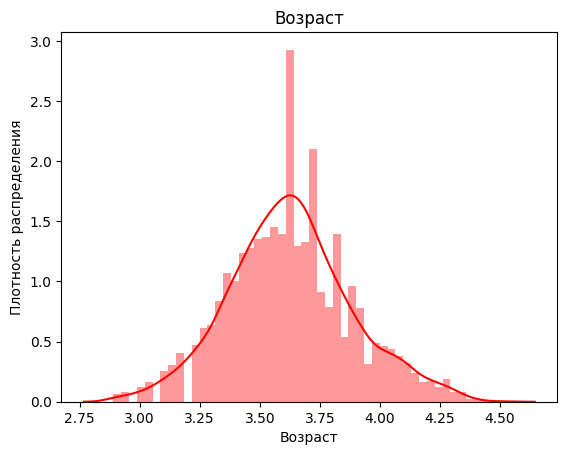

In [ ]:
#посмотрим на плотность распределения
sns.distplot(df['Age'],color='red')
plt.xlabel('Возраст')
plt.ylabel('Плотность распределения')
plt.title('Возраст')
plt.show()
plt.show()

In [ ]:
df['Age']

0       3.737670
1       3.713572
2       3.737670
3       3.663562
4       3.761200
          ...   
9995    3.663562
9996    3.555348
9997    3.583519
9998    3.737670
9999    3.332205
Name: Age, Length: 10000, dtype: float64

In [ ]:
#проверяем остались ли выбросы
# интерквантильный размах
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

# насколько размахов отступать
up_bound = df['Age'].quantile(0.75) + (IQR * 3)
low_bound = df['Age'].quantile(0.25) - (IQR * 3)

anomalies = pd.concat([df['Age']>up_bound, df['Age']<low_bound], axis=1).any(axis=1)

In [ ]:
anomalies.sum()

0

## 7. Проверяем гипотезы

> В этой части тетрадки мы будем проверять гипотезы.

Равны ли среднее по возрасту тех кто ушел из банка и тех кто остался

In [ ]:
import scipy.stats as stats

In [ ]:
import numpy as np

$H_0:\mu_{Возраст_ушедшихклиентов}=\mu_{возрастоставшихсяклиентов}$

$H_1:\mu_{возрастушедшихклиентов}>\mu_{возрастоставшихсяклиентов}$

In [ ]:
x = df[(df['Exited'] == 1)]['Age'].dropna().values
y = df[(df['Exited'] == 0)]['Age'].dropna().values

Text(0, 0.5, 'Возраст')

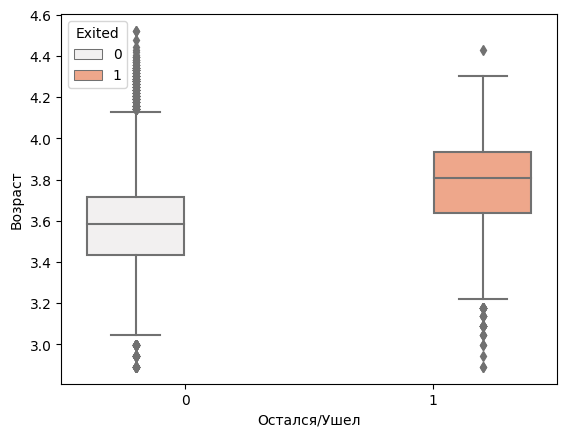

In [ ]:
sns.boxplot(y='Age',x='Exited', hue='Exited',data = df,color="lightsalmon")
plt.xlabel('Остался/Ушел')
plt.ylabel('Возраст')

In [ ]:
x,y

(array([3.73766962, 3.73766962, 3.78418963, ..., 3.97029191, 3.58351894,
        3.73766962]),
 array([3.71357207, 3.66356165, 3.76120012, ..., 3.66356165, 3.55534806,
        3.33220451]))

In [ ]:
alpha = 0.05
nx, ny = x.size, y.size

diff = x.mean() - y.mean()
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/ny)
z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha)
print(f'Наблюдаемое значение {z_obs:.3} больше  критического значения {z_crit:.3} => нулевая гипотеза отвергается')

Наблюдаемое значение 32.5 больше  критического значения 1.64 => нулевая гипотеза отвергается


In [ ]:
x.mean()

3.777821734188304

In [ ]:
y.mean()

3.5891826737700505

In [ ]:
z_crit

1.6448536269514722

равны ли доли тех, кто имеет кредитную карту и тех,кто не имеет кредитную карту

In [ ]:
from scipy import stats

$H_0:p_{естькредитная карта}=p_{неткредитнойкарты}$

$H_1:p_{естькредитная карта}>p_{неткредитной карта}$

Text(0, 0.5, 'Количество человек')

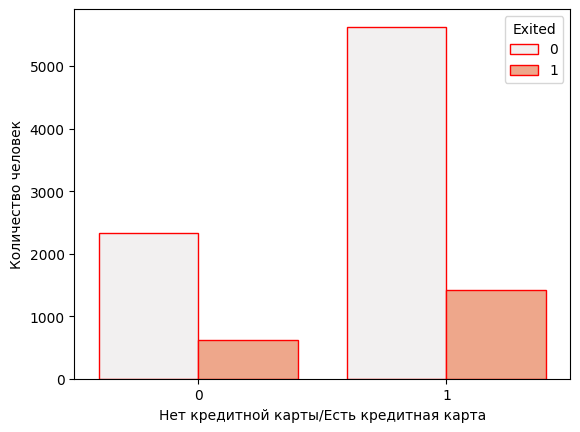

In [ ]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df,color="lightsalmon", ec="red")
plt.xlabel('Нет кредитной карты/Есть кредитная карта')
plt.ylabel('Количество человек')

In [ ]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
df1=df[df['HasCrCard']==0]['Exited'].values

In [ ]:
df1.size

2945

In [ ]:
df1.sum()

613

In [ ]:
df2=df[df['HasCrCard']==1]['Exited'].values

In [ ]:
df2.size

7055

In [ ]:
df2.sum()

1425

In [ ]:
px = df1.mean()
py=df2.mean()
nx,ny=df1.size,df2.size
mx,my=df1.sum(),df2.sum()
P=(mx+my)/(nx+ny)
z_obs = (px-py)/np.sqrt(P*(1-P)*(1/nx+1/ny))
pval = 1 - stats.norm.cdf(z_obs)
z_crit = stats.norm.ppf(1 - alpha)
print(f'Наблюдаемое значение {z_obs:.3} меньше критического {z_crit:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение 0.698 меньше критического 1.64 => нулевая гипотеза не отвергается


In [ ]:
pval

0.2427114708133048

In [ ]:
px,py

(0.20814940577249574, 0.20198440822111977)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,3.737670,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,3.713572,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,3.737670,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,3.663562,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,3.761200,2,125510.82,1,1,1,79084.10,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,3.663562,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300
9996,516,France,Male,3.555348,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771
9997,709,France,Female,3.583519,7,0.00,1,0,1,42085.58,1,3,SILVER,564
9998,772,Germany,Male,3.737670,3,75075.31,2,1,0,92888.52,1,2,GOLD,339


равны ли доли активных клиентов и неактивных клиентов

$H_0:p_{активныеклиенты}=p_{неактивныеклиенты}$


$H_1:p_{активныеклиенты}>p_{неактивныеклиенты}$

In [ ]:
df1=df[df['IsActiveMember']==0]['Exited']

In [ ]:
df1

2       1
3       0
5       1
7       1
10      0
       ..
9993    0
9994    0
9995    0
9998    1
9999    0
Name: Exited, Length: 4849, dtype: int64

In [ ]:
df2=df[df['IsActiveMember']==1]['Exited']

In [ ]:
(df2==1).sum()

735

In [ ]:
df1.sum()

1303

In [ ]:
df2.sum()

735

In [ ]:
df1.size

4849

In [ ]:
df2.size

5151

In [ ]:
px = df1.mean()
py=df2.mean()
nx,ny=df1.size,df2.size
mx,my=df1.sum(),df2.sum()
P=(mx+my)/(nx+ny)
z_obs = (px-py)/np.sqrt(P*(1-P)*(1/nx+1/ny))
pval = 1 - stats.norm.cdf(z_obs)
z_crit = stats.norm.ppf(1 - alpha)
print(f'Наблюдаемое значение {z_obs:.3} больше критического {z_crit:.3} => нулевая гипотеза отвергается')

Наблюдаемое значение 15.6 больше критического 1.64 => нулевая гипотеза отвергается


In [ ]:
pval

0.0

In [ ]:
px,py

(0.26871519901010515, 0.14269073966220153)

равны ли средняя ориентировочная зп ушедших клиентов и не ушедших клиентов

$H_0:\mu_{зпушедшихклиентов}=\mu_{зпотсавшихсяклиентов}$

$H_1:\mu_{зпушедшихклиентов}>\mu_{зпоставшихсяклиентов}$

Text(0, 0.5, 'Возраст')

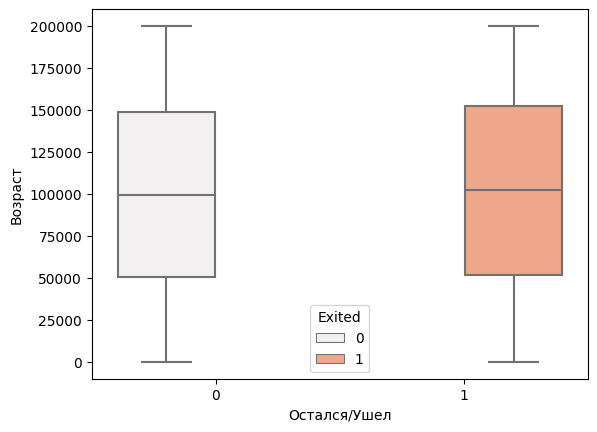

In [ ]:
sns.boxplot(y='EstimatedSalary',x='Exited', hue='Exited',data = df,color="lightsalmon")
plt.xlabel('Остался/Ушел')
plt.ylabel('Возраст')

In [ ]:
x = df[(df['Exited'] == 1)]['EstimatedSalary'].dropna().values
y = df[(df['Exited'] == 0)]['EstimatedSalary'].dropna().values

In [ ]:
alpha = 0.05
nx, ny = x.size, y.size

diff = x.mean() - y.mean()
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/ny)

z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha)
pval = 1 - stats.norm.cdf(z_obs)
print(f'Наблюдаемое значение {z_obs:.3} меньше критического {z_crit:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.24 меньше критического 1.64 => нулевая гипотеза не отвергается


In [ ]:
pval

0.10709461439245072

## 8. Масштабирование признаков


In [ ]:
columns = ['Age','Balance','EstimatedSalary','Point Earned','CreditScore']

In [ ]:
df['Age']=(df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())

In [ ]:
df['Balance']=(df['Balance']-df['Balance'].min())/(df['Balance'].max()-df['Balance'].min())

In [ ]:
df['EstimatedSalary']=(df['EstimatedSalary']-df['EstimatedSalary'].min())/(df['EstimatedSalary'].max()-df['EstimatedSalary'].min())

In [ ]:
df['Point Earned']=(df['Point Earned']-df['Point Earned'].min())/(df['Point Earned'].max()-df['Point Earned'].min())

In [ ]:
df['CreditScore']=(df['CreditScore']-df['CreditScore'].min())/(df['CreditScore'].max()-df['CreditScore'].min())

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,0.538,France,Female,0.519363,2,0.000000,1,1,1,0.506735,1,2,DIAMOND,0.391600
1,0.516,Spain,Female,0.504592,1,0.334031,1,0,1,0.562709,0,3,DIAMOND,0.382520
2,0.304,France,Female,0.519363,8,0.636357,3,1,0,0.569654,1,3,DIAMOND,0.292849
3,0.698,France,Female,0.473938,1,0.000000,2,0,0,0.469120,0,5,GOLD,0.262202
4,1.000,Spain,Female,0.533787,2,0.500246,1,1,1,0.395400,0,5,GOLD,0.347333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.473938,5,0.000000,2,1,0,0.481341,0,1,DIAMOND,0.205448
9996,0.332,France,Male,0.407607,10,0.228657,1,1,1,0.508490,0,5,PLATINUM,0.740068
9997,0.718,France,Female,0.424874,7,0.000000,1,0,1,0.210390,1,3,SILVER,0.505108
9998,0.844,Germany,Male,0.519363,3,0.299226,2,1,0,0.464429,1,2,GOLD,0.249716


In [ ]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Female' else 0)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,0.538,France,1,0.519363,2,0.000000,1,1,1,0.506735,1,2,DIAMOND,0.391600
1,0.516,Spain,1,0.504592,1,0.334031,1,0,1,0.562709,0,3,DIAMOND,0.382520
2,0.304,France,1,0.519363,8,0.636357,3,1,0,0.569654,1,3,DIAMOND,0.292849
3,0.698,France,1,0.473938,1,0.000000,2,0,0,0.469120,0,5,GOLD,0.262202
4,1.000,Spain,1,0.533787,2,0.500246,1,1,1,0.395400,0,5,GOLD,0.347333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,0,0.473938,5,0.000000,2,1,0,0.481341,0,1,DIAMOND,0.205448
9996,0.332,France,0,0.407607,10,0.228657,1,1,1,0.508490,0,5,PLATINUM,0.740068
9997,0.718,France,1,0.424874,7,0.000000,1,0,1,0.210390,1,3,SILVER,0.505108
9998,0.844,Germany,0,0.519363,3,0.299226,2,1,0,0.464429,1,2,GOLD,0.249716


In [ ]:
df = pd.get_dummies(df)#все object переведет в дамми переменные
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0.538,1,0.519363,2,0.000000,1,1,1,0.506735,1,2,0.391600,1,0,0,1,0,0,0
1,0.516,1,0.504592,1,0.334031,1,0,1,0.562709,0,3,0.382520,0,0,1,1,0,0,0
2,0.304,1,0.519363,8,0.636357,3,1,0,0.569654,1,3,0.292849,1,0,0,1,0,0,0
3,0.698,1,0.473938,1,0.000000,2,0,0,0.469120,0,5,0.262202,1,0,0,0,1,0,0
4,1.000,1,0.533787,2,0.500246,1,1,1,0.395400,0,5,0.347333,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.473938,5,0.000000,2,1,0,0.481341,0,1,0.205448,1,0,0,1,0,0,0
9996,0.332,0,0.407607,10,0.228657,1,1,1,0.508490,0,5,0.740068,1,0,0,0,0,1,0
9997,0.718,1,0.424874,7,0.000000,1,0,1,0.210390,1,3,0.505108,1,0,0,0,0,0,1
9998,0.844,0,0.519363,3,0.299226,2,1,0,0.464429,1,2,0.249716,0,1,0,0,1,0,0


## 9. Строим модели

# **Метод к ближайших соседей**

In [ ]:
X=df.drop(['Exited'],axis=1)#обучающая

In [ ]:
y=df['Exited']#тестовая

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)#делим данные на обучающую и тестовую выборку

In [ ]:
X_train.shape

(8000, 18)

In [ ]:
y_train.shape

(8000,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier#с помощью классификации
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_clf.predict(X_test)#вернет те классы к которым думает принадлежит выборка

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': range(1, 20, 2), 'weights': ['uniform', 'distance'],'p': [1, 2, 3]},cv=KFold(n_splits=5,random_state=10, shuffle=True))#разбиение выборки во время кросс-валидации

In [ ]:
grid_searcher.fit(X_train, y_train);

In [ ]:
grid_searcher.best_params_

{'n_neighbors': 15, 'p': 3, 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
best_predictions = grid_searcher.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score #доля верных ответов

In [ ]:
predict1=accuracy_score(y_test,best_predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,best_predictions)

array([[1584,   33],
       [ 349,   34]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

Text(0, 0.5, 'fact')

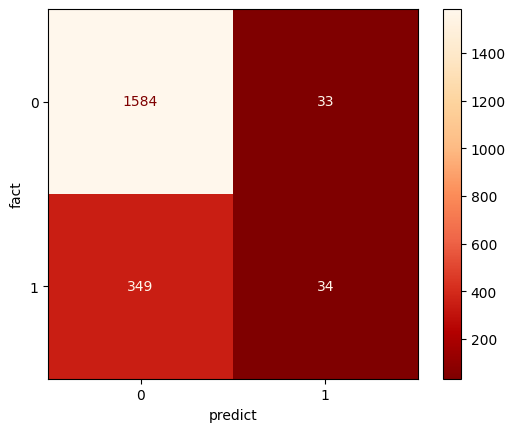

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_searcher, X_test, y_test,cmap='OrRd_r')
plt.xlabel('predict')
plt.ylabel('fact')

In [ ]:
metrics = []
for n in range(1, 40, 2):#переберем соседей от 1 до 40 с шагом 2
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train,y_train)
  metrics.append(accuracy_score(y_test,knn.predict(X_test)))

Text(0.5, 0, 'Число соседей')

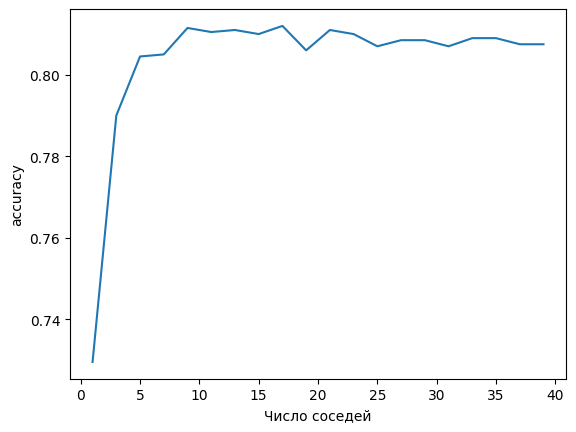

In [ ]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('accuracy')
plt.xlabel('Число соседей')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, best_predictions)

0.5074626865671642

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
from sklearn.metrics import recall_score
recall1=recall_score(y_test, best_predictions)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, best_predictions)

0.1511111111111111

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn import metrics

In [ ]:
print('Used params:', grid_searcher.best_params_)
print('Evaluation:\n', metrics.classification_report(y_test, best_predictions))

Used params: {'n_neighbors': 15, 'p': 3, 'weights': 'uniform'}
Evaluation:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1617
           1       0.51      0.09      0.15       383

    accuracy                           0.81      2000
   macro avg       0.66      0.53      0.52      2000
weighted avg       0.76      0.81      0.75      2000



Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(fit_intercept=True,random_state=10)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [ ]:
predict=clf.predict(X_test)

In [ ]:
clf.coef_.shape

(1, 18)

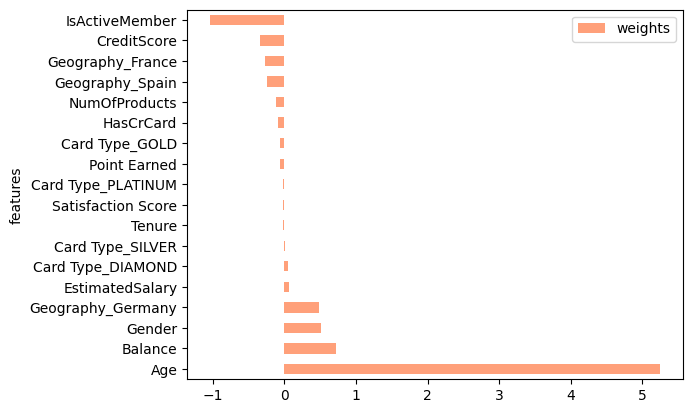

In [ ]:
sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)#отсортируем веса и азвание признаков
weights = [x[0] for x in sorted_weights]#отсортированные веса
features = [x[1] for x in sorted_weights]#отсортированные названия признаков
df = pd.DataFrame({'features': features, 'weights':weights})
ax = df.plot.barh(x='features', y='weights', rot=0, color='lightsalmon')

In [ ]:
clf.coef_#массив

array([[-3.37598195e-01,  5.16700809e-01,  5.25456621e+00,
        -1.48124389e-02,  7.28576558e-01, -1.14104771e-01,
        -9.49775520e-02, -1.04425295e+00,  6.96949933e-02,
        -1.69832767e-02, -5.90190928e-02, -2.69028971e-01,
         4.85903688e-01, -2.48231780e-01,  4.79204770e-02,
        -6.40833440e-02, -1.84601038e-02,  3.26590768e-03]])

In [ ]:
clf.coef_.ravel()#вектор

array([-3.37598195e-01,  5.16700809e-01,  5.25456621e+00, -1.48124389e-02,
        7.28576558e-01, -1.14104771e-01, -9.49775520e-02, -1.04425295e+00,
        6.96949933e-02, -1.69832767e-02, -5.90190928e-02, -2.69028971e-01,
        4.85903688e-01, -2.48231780e-01,  4.79204770e-02, -6.40833440e-02,
       -1.84601038e-02,  3.26590768e-03])

In [ ]:
sorted_weights = sorted(zip(clf.coef_.ravel(), X_train.columns), reverse=True)#отсортируем веса и название этих признаков чтобы получить важность признаков

In [ ]:
sorted_weights

[(5.254566214129102, 'Age'),
 (0.7285765578400109, 'Balance'),
 (0.5167008093397056, 'Gender'),
 (0.4859036882161565, 'Geography_Germany'),
 (0.06969499333110502, 'EstimatedSalary'),
 (0.04792047704380634, 'Card Type_DIAMOND'),
 (0.003265907681760086, 'Card Type_SILVER'),
 (-0.014812438891329839, 'Tenure'),
 (-0.01698327670198248, 'Satisfaction Score'),
 (-0.018460103833992592, 'Card Type_PLATINUM'),
 (-0.05901909275764521, 'Point Earned'),
 (-0.06408334397611228, 'Card Type_GOLD'),
 (-0.09497755197751596, 'HasCrCard'),
 (-0.11410477068728825, 'NumOfProducts'),
 (-0.2482317800741725, 'Geography_Spain'),
 (-0.2690289712264916, 'Geography_France'),
 (-0.3375981948458737, 'CreditScore'),
 (-1.044252953433336, 'IsActiveMember')]

In [ ]:
weights = [x[0] for x in sorted_weights]#веса

In [ ]:
features = [x[1] for x in sorted_weights]#признаки

In [ ]:
df1 = pd.DataFrame({'features': features, 'weights':weights})#важность весов и их название
df1

,features,weights
0,Age,5.254566
1,Balance,0.728577
2,Gender,0.516701
3,Geography_Germany,0.485904
4,EstimatedSalary,0.069695
5,Card Type_DIAMOND,0.047920
6,Card Type_SILVER,0.003266
7,Tenure,-0.014812
8,Satisfaction Score,-0.016983
9,Card Type_PLATINUM,-0.018460


In [ ]:
logreg_params = {'C': np.logspace(-3, 3, 10), 'penalty': ['l2', 'l1']}
logreg_grid = GridSearchCV(clf, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)

y_pred = logreg_grid.best_estimator_.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
np.logspace(-3, 3, 10)

In [ ]:
logreg_grid.best_estimator_

LogisticRegression(C=215.44346900318823, random_state=10)

In [ ]:
logreg_grid


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=10),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'l1']},
             scoring='f1')

In [ ]:
print(logreg_grid.best_params_)

{'C': 215.44346900318823, 'penalty': 'l2'}


In [ ]:
logreg_grid.best_estimator_.coef_

array([[-0.35744228,  0.52232689,  5.46886938, -0.01492999,  0.75016657,
        -0.11169222, -0.10013602, -1.06667941,  0.07255687, -0.01729006,
        -0.0601907 , -0.98099197, -0.22562958, -0.96069393, -0.48625227,
        -0.59771049, -0.55347041, -0.52988231]])

In [ ]:
predict=logreg_grid.predict(X_test)

In [ ]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
pred_prob = np.ravel(logistic_function(np.dot(X_test, logreg_grid.best_estimator_.coef_.T)))

In [ ]:
def threshold(pred_prob, t):
    y_pred_t = pred_prob.copy()
    y_pred_t[y_pred_t > t] = 1
    y_pred_t[y_pred_t <= t] = 0
    return y_pred_t

In [ ]:
t = 0.5#все что выше 0.5 класс 1, а если меньше 0.5, то класс -1
y_pred_t = threshold(pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y_test, y_pred_t))
print('Recall:', recall_score(y_test, y_pred_t))

t = 0.5
Precision: 0.2631172839506173
Recall: 0.8903394255874674


In [ ]:
t = 0.75
y_pred_t = threshold(pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y_test, y_pred_t))
print('Recall:', recall_score(y_test, y_pred_t))#значение точности увеличилось а значение полноты резко упало

t = 0.75
Precision: 0.40574506283662476
Recall: 0.5900783289817232


In [ ]:
t = 0.25
y_pred_t = threshold(pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y_test, y_pred_t))
print('Recall:', recall_score(y_test, y_pred_t))

t = 0.25
Precision: 0.2073104200763775
Recall: 0.9921671018276762


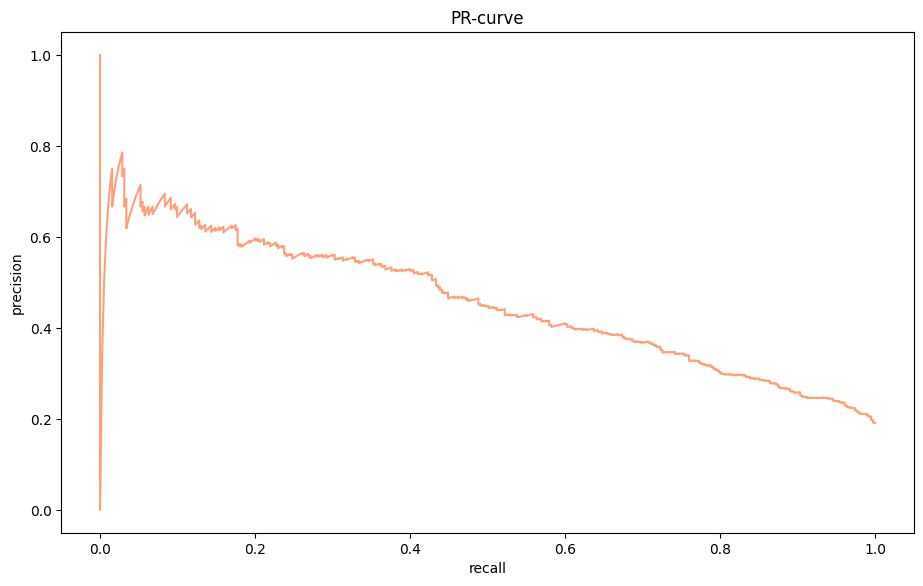

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_array, recall_array, thresholds = precision_recall_curve(y_test, pred_prob)
plt.figure(figsize=(11, 6.5))
plt.plot(recall_array, precision_array,color='lightsalmon')
plt.title('PR-curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [ ]:
from sklearn.metrics import auc
auc(recall_array, precision_array)

0.45422245356909496

In [ ]:
from sklearn.metrics import recall_score
recall2=recall_score(y_test, predict)

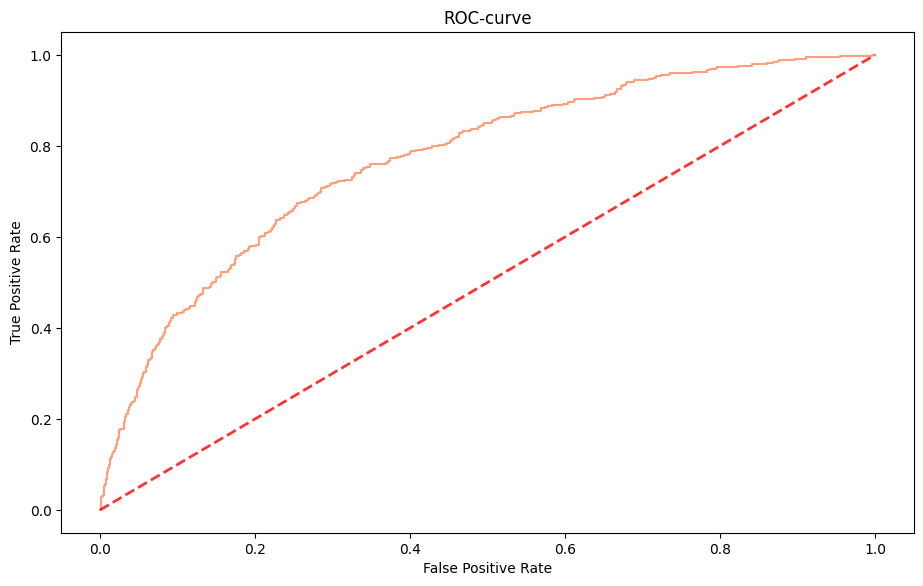

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(11, 6.5))
plt.plot(fpr, tpr, color='lightsalmon')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.title('ROC-curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_prob)

0.7713878810484556

In [ ]:
pred_predict_proba = clf.predict_proba(X_test)[:, 1]#нам нужно вероятность принадлежности к классу 1

In [ ]:
np.all([pred_prob, pred_predict_proba])

True

In [ ]:
np.mean((pred_prob > 0.5) == y_test)

0.5015

In [ ]:
pred = clf.predict(X_test)
np.mean(pred == y_test)

0.821

(array([1617.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         383.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

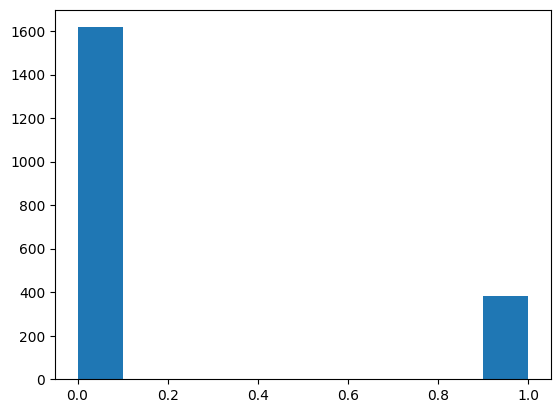

In [ ]:
plt.hist(y_test)

(array([608., 552., 324., 197., 140.,  73.,  53.,  37.,  14.,   2.]),
 array([0.00494785, 0.09334413, 0.18174041, 0.2701367 , 0.35853298,
        0.44692926, 0.53532554, 0.62372183, 0.71211811, 0.80051439,
        0.88891067]),
 <BarContainer object of 10 artists>)

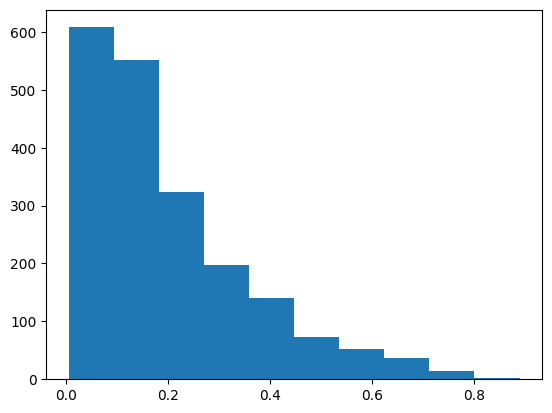

In [ ]:
plt.hist(clf.predict_proba(X_test)[:, 1])

In [ ]:
predict2=accuracy_score(y_test,predict)

In [ ]:
predict2

0.8205

In [ ]:
from sklearn.metrics import precision_score


In [ ]:
precision_score(y_test,predict)

0.5895522388059702

In [ ]:
recall_score(y_test,predict)

0.206266318537859

In [ ]:
from sklearn.metrics import auc
auc(recall_array, precision_array)

0.45422245356909496

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predict)

0.5861263565478411

In [ ]:
from sklearn. metrics import classification_report

In [ ]:
report = classification_report(y_test, logreg_grid.best_estimator_.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1617
           1       0.59      0.21      0.31       383

    accuracy                           0.82      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.79      0.82      0.78      2000



Text(0, 0.5, 'fact')

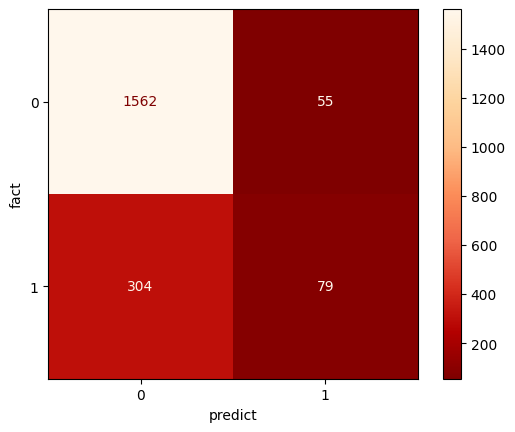

In [ ]:
ConfusionMatrixDisplay.from_estimator(logreg_grid, X_test, y_test,cmap='OrRd_r')
plt.xlabel('predict')
plt.ylabel('fact')

Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_features=0.2)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2)

In [ ]:
Q = []
for n_est in range(1, 200, 2):#какое кол-во деревьев будем перебирать
  clf = RandomForestClassifier(n_estimators=n_est, max_features=0.2)
  clf.fit(X_train, y_train)
  Q.append(accuracy_score(y_test, clf.predict(X_test)))#добавим качестов предсказания по метрике  accuracy

Text(0, 0.5, 'accuracy')

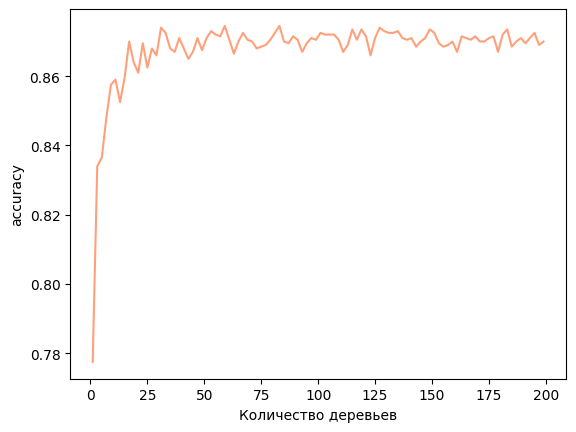

In [ ]:
plt.plot(range(1, 200, 2), Q,color='lightsalmon')
plt.xlabel('Количество деревьев')
plt.ylabel('accuracy')

In [ ]:
Q = []
for m_f in range(1, 11):#параметр max_features отвечает за то какое кол-во признаков мы будем перебирать для лучшего разбиения в каждой вершине
  clf = RandomForestClassifier(n_estimators=100, max_features=m_f)
  clf.fit(X_train, y_train)
  Q.append(accuracy_score(y_test, clf.predict(X_test)))

Text(0, 0.5, 'accuracy')

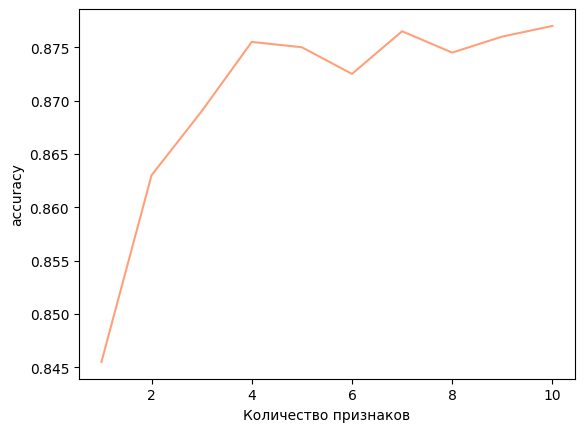

In [ ]:
plt.plot(range(1, 11), Q, color='lightsalmon')
plt.xlabel('Количество признаков')
plt.ylabel('accuracy')

In [ ]:
clf = RandomForestClassifier(n_estimators=200, max_features=0.8)
clf.fit(X_train, y_train)
accuracy_score(y_test,  clf.predict(X_test))

0.872

In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestClassifier(random_state=0)

clf = GridSearchCV(regr, parameters)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.best_params_

{'max_depth': 4, 'n_estimators': 300}

In [ ]:
from sklearn.metrics import recall_score
recall3=recall_score(y_test, y_pred)

In [ ]:
report = classification_report(y_test, clf.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1617
           1       0.86      0.19      0.31       383

    accuracy                           0.84      2000
   macro avg       0.85      0.59      0.61      2000
weighted avg       0.84      0.84      0.79      2000



Text(0, 0.5, 'fact')

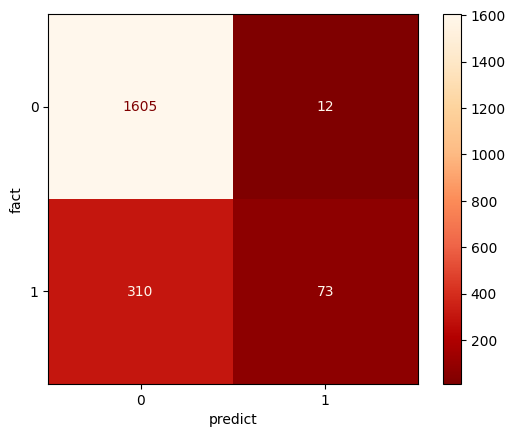

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,cmap='OrRd_r')
plt.xlabel('predict')
plt.ylabel('fact')

In [ ]:
predict3=accuracy_score(y_test, clf.predict(X_test))

Метод опорных векторов

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.svm import SVC
clf = SVC()

In [ ]:
clf.fit(X_train,y_train)

SVC()

In [ ]:
predict = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,predict)

0.812

In [ ]:
grid_searcher = GridSearchCV(SVC(),param_grid={'C': [0.001,100,10], 'kernel': ['rbf']},cv=5)

In [ ]:
grid_searcher.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 100, 10], 'kernel': ['rbf']})

In [ ]:
grid_searcher.best_params_

{'C': 100, 'kernel': 'rbf'}

In [ ]:
best_predictions = grid_searcher.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score
recall4=recall_score(y_test, best_predictions)

In [ ]:
report = classification_report(y_test, grid_searcher.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1617
           1       0.75      0.38      0.50       383

    accuracy                           0.86      2000
   macro avg       0.81      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



Text(0, 0.5, 'fact')

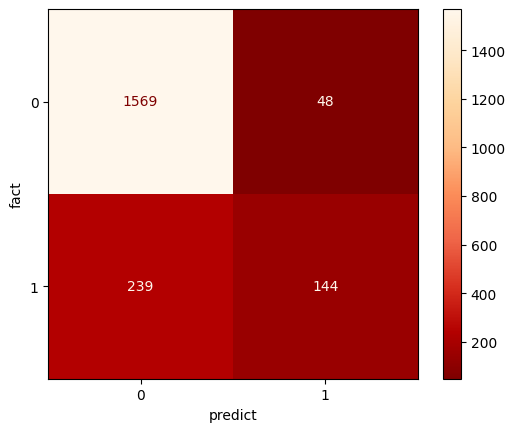

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_searcher, X_test, y_test,cmap='OrRd_r')
plt.xlabel('predict')
plt.ylabel('fact')

In [ ]:
predict4=accuracy_score(y_test,best_predictions)

Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier()

In [ ]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
predict = GBC.predict(X_test)

In [ ]:
predict5=accuracy_score(y_test,predict)

In [ ]:
parameters = {'learning_rate': [0.01,0.02],
                  'subsample'    : [0.9, 0.5],
                  'n_estimators' : [100,500],
                  'max_depth'    : [4,6]
                 }

In [ ]:
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 5, n_jobs=-1)


In [ ]:
grid_GBC.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02], 'max_depth': [4, 6],
                         'n_estimators': [100, 500], 'subsample': [0.9, 0.5]})

In [ ]:
grid_GBC.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

In [ ]:
report = classification_report(y_test, grid_GBC.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1617
           1       0.77      0.49      0.60       383

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.87      0.87      0.86      2000



In [ ]:
from sklearn.metrics import recall_score
recall5=recall_score(y_test, grid_GBC.predict(X_test))

Text(0, 0.5, 'fact')

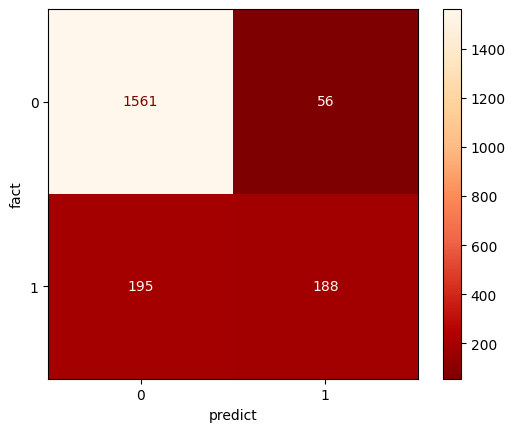

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_GBC, X_test, y_test,cmap='OrRd_r')
plt.xlabel('predict')
plt.ylabel('fact')

In [ ]:
from sklearn.metrics import recall_score
recall5=recall_score(y_test, grid_GBC.predict(X_test))

Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

In [ ]:
accuracy_score(y_test, dt.predict(X_test))

0.8505

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.01, 0.001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=10)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto'}

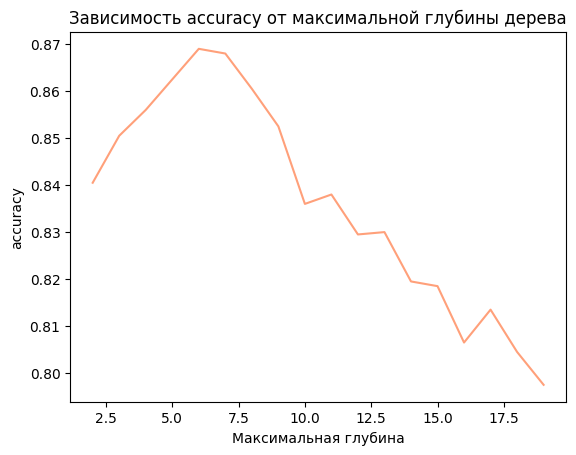

In [ ]:
max_depth_array = range(2, 20)
accuracy_array = []
for max_depth in max_depth_array:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    accuracy_array.append(accuracy_score(y_test, dt.predict(X_test)))
plt.plot(max_depth_array, accuracy_array,color='lightsalmon')
plt.title('Зависимость accuracy от максимальной глубины дерева')
plt.xlabel('Максимальная глубина')
plt.ylabel('accuracy')
plt.show()

In [ ]:
pd.DataFrame({
    'max_depth': max_depth_array,
    'accuracy': accuracy_array
}).sort_values(by='accuracy').reset_index(drop=True)

,max_depth,accuracy
0,19,0.7975
1,18,0.8045
2,16,0.8065
3,17,0.8135
4,15,0.8185
5,14,0.8195
6,12,0.8295
7,13,0.8300
8,10,0.8360
9,11,0.8380


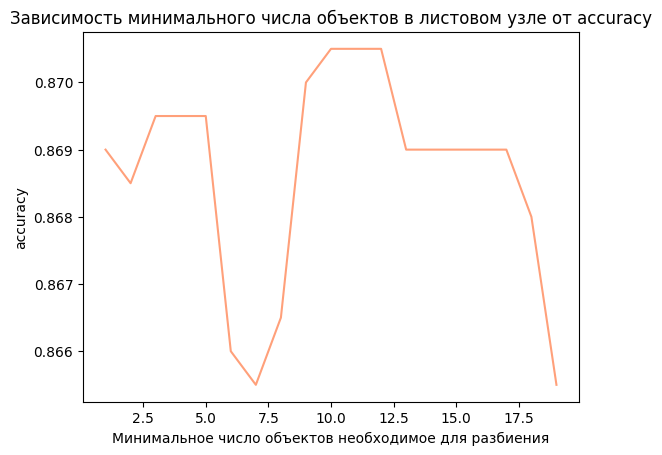

In [ ]:
min_samples_leaf_array = range(1, 20)
accuracy_array = []
for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    accuracy_array.append(accuracy_score(y_test, dt.predict(X_test)))
plt.plot(min_samples_leaf_array, accuracy_array,color='lightsalmon')
plt.title('Зависимость минимального числа объектов в листовом узле от accuracy')
plt.xlabel('Минимальное число объектов необходимое для разбиения')
plt.ylabel('accuracy')
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [ ]:
predict6=accuracy_score(y_test, dt.predict(X_test))

In [ ]:
report = classification_report(y_test, grid_search.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1617
           1       0.66      0.39      0.49       383

    accuracy                           0.84      2000
   macro avg       0.76      0.67      0.70      2000
weighted avg       0.83      0.84      0.83      2000



In [ ]:
from sklearn.metrics import recall_score
recall6=recall_score(y_test, grid_search.predict(X_test))

Text(0, 0.5, 'fact')

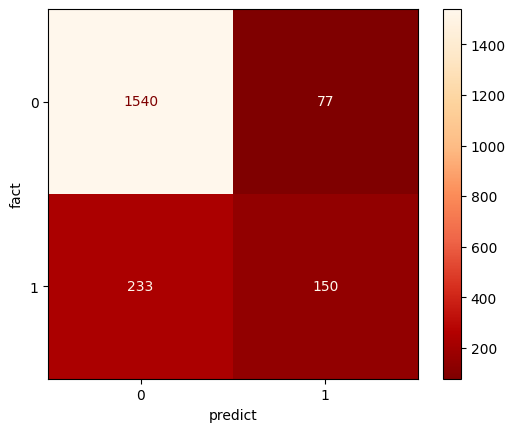

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test,cmap='OrRd_r')
plt.xlabel('predict')
plt.ylabel('fact')

Выводы

In [ ]:
accuracy = pd.DataFrame({'Модели':['К-ближайших соседей','Логистическая регрессия','Случайный лес','Метод опорных векторов','Градиентный бустинг','Дерево решений'],
                          'recall':[recall1,recall2,recall3,recall4,recall5,recall6]})
accuracy

,Модели,recall
0,К-ближайших соседей,0.088773
1,Логистическая регрессия,0.206266
2,Случайный лес,0.190601
3,Метод опорных векторов,0.375979
4,Градиентный бустинг,0.490862
5,Дерево решений,0.391645


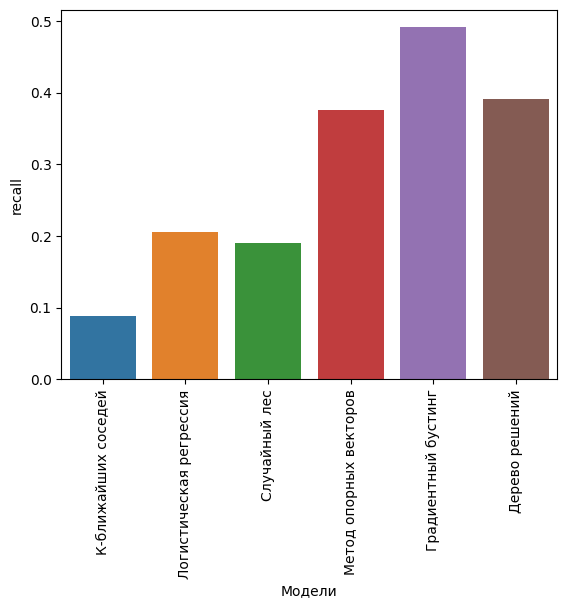

In [ ]:
a=sns.barplot(data=accuracy,x="Модели",y="recall")
a.set_xticklabels(a.get_xticklabels(), rotation=90);